# Setup

In [1]:
%run ../../setup.ipynb

# Carico dati

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [3]:
df_all = calcola_scarto(df_all)

In [4]:
df_all

,worker_id,paid,task_id,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,global_outcome,global_form_validity,gold_checks,time_spent_check,time_check_amount,quartile,mean,sovra,scarto,scarto_medio
0,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:21:27 GMT",2022-08-23 12:21:27 00:00,...,True,True,True,True,True,other,3.4,other,0,0.833333
1,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Finish,"Tue, 23 Aug 2022 12:23:46 GMT",2022-08-23 12:23:46 00:00,...,True,True,True,True,True,other,1.4,other,0,0.833333
2,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:02:59 GMT",2022-08-23 12:02:59 00:00,...,True,True,True,True,True,correct_false,1.2,pants-on-fire,1,0.833333
3,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:09:17 GMT",2022-08-23 12:09:17 00:00,...,True,True,True,True,True,other,2.6,other,2,0.833333
4,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:12:09 GMT",2022-08-23 12:12:09 00:00,...,True,True,True,True,True,other,2.7,other,2,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 10:57:48 GMT",2022-08-23 10:57:48 00:00,...,True,True,True,True,True,other,2.1,other,3,1.666667
1195,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:00:57 GMT",2022-08-23 11:00:57 00:00,...,True,True,True,True,True,other,1.1,other,1,1.666667
1196,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:06:10 GMT",2022-08-23 11:06:10 00:00,...,True,True,True,True,True,wrong_true,3.2,true,1,1.666667
1197,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:09:15 GMT",2022-08-23 11:09:15 00:00,...,True,True,True,True,True,other,2.6,other,3,1.666667


RQ2 : analisi degli statement

# Analisi

Poichè sto analizzando gli statement e nel dataset df_all ho tante occorrenze dello stesso (pocihè ognuno è stato valutato da 10 worker diversi) tengo 1 occorrenza di ciascuno

In [5]:
df_analisi = df_all.copy()

In [6]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

### sistemo dati

In [7]:
# quanti valori unici ci sono per ogni dimensione
for dimensione in dimensioni_da_analizzare:
    print(dimensione, len(df_analisi[dimensione].unique()))

doc_index 8
doc_speaker_party 2
doc_statement_date 66


In [8]:
df_analisi[dimensioni_da_analizzare].head()

,doc_index,doc_speaker_party,doc_statement_date
0,6.0,DEM,2022-03-15
1,7.0,DEM,2022-06-13
2,0.0,REP,2022-04-04
3,2.0,DEM,2022-05-27
4,3.0,DEM,2022-07-13


In [9]:
for index, row in df_analisi.iterrows():
    mese = row["doc_statement_date"]
    mese = float(mese[5:7])
    #row["doc_statement_date"] = mese
    df_analisi.at[index,"doc_statement_date"] = mese

In [10]:
for dimensione in dimensioni_da_analizzare:
    print(dimensione, len(df_analisi[dimensione].unique()))

doc_index 8
doc_speaker_party 2
doc_statement_date 11


In [11]:
df_analisi[dimensioni_da_analizzare].head()

,doc_index,doc_speaker_party,doc_statement_date
0,6.0,DEM,3.0
1,7.0,DEM,6.0
2,0.0,REP,4.0
3,2.0,DEM,5.0
4,3.0,DEM,7.0


In [12]:
df_analisi.columns

Index(['worker_id', 'paid', 'task_id', 'batch_name', 'unit_id', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_index', 'doc_id', 'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'doc_fact_check_source',
       'doc_speaker_name', 'doc_speaker_party', 'doc_statement_date',
       'doc_statement_description', 'doc_statement_text', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_labe

In [13]:
df_analisi["correct_false"] = 0
df_analisi["correct_true"] = 0
df_analisi["wrong_false"] = 0
df_analisi["wrong_true"] = 0

for index, row in df_analisi.iterrows():
    if row ["quartile"] == "correct_false":
        df_analisi.loc[index, "correct_false"] = 1
    if row ["quartile"] == "correct_true":
        df_analisi.loc[index, "correct_true"] = 1
    if row ["quartile"] == "wrong_false":
        df_analisi.loc[index, "wrong_false"] = 1
    if row ["quartile"] == "wrong_true":
        df_analisi.loc[index, "wrong_true"] = 1
        

In [14]:
df_analisi["trimestre"] = 0
df_analisi["quadrimestre"] = 0
df_analisi["start_or_end_of_the_year"] = 0
df_analisi["middle_of_the_year"] = 0

for index, row in df_analisi.iterrows():
    mese = row["doc_statement_date"]
    if mese <= 3:
        df_analisi.at[index,"trimestre"] = 1
    if mese > 3 and mese <= 6:
        df_analisi.at[index,"trimestre"] = 2
    if mese > 6 and mese <= 9:
        df_analisi.at[index,"trimestre"] = 3
    if mese > 9 and mese <= 12:
        df_analisi.at[index,"trimestre"] = 4
    if mese <= 4:
        df_analisi.at[index,"quadrimestre"] = 1
    if mese > 4 and mese <= 8:
        df_analisi.at[index,"quadrimestre"] = 2
    if mese > 8 and mese <= 12:
        df_analisi.at[index,"quadrimestre"] = 3
    if mese == 1 or mese == 12 or mese == 2 or mese == 11:
        df_analisi.at[index,"start_or_end_of_the_year"] = 1
    if mese == 5 or mese == 6 or mese == 7 :
        df_analisi.at[index,"middle_of_the_year"] = 1

In [15]:
df_analisi["index_iniziali"] = 0
df_analisi["index_finali"] = 0

for index, row in df_analisi.iterrows():
    if float(row["doc_index"]) < 4:
        df_analisi.at[index,"index_iniziali"] = 1
    if float(row["doc_index"]) > 4:
        df_analisi.at[index,"index_finali"] = 1
    

In [16]:
df_analisi = df_analisi[["worker_id","unit_id","doc_id","doc_statement_text","doc_index","index_iniziali","index_finali","doc_speaker_party","doc_statement_date","trimestre","quadrimestre","middle_of_the_year","start_or_end_of_the_year","quartile","doc_truthfulness_index","mean","sovra","doc_fact_check_ground_truth_label","scarto",'wrong_false', 'correct_false', 'wrong_true', 'correct_true']]

In [17]:
df_analisi.head()

,worker_id,unit_id,doc_id,doc_statement_text,doc_index,index_iniziali,index_finali,doc_speaker_party,doc_statement_date,trimestre,...,quartile,doc_truthfulness_index,mean,sovra,doc_fact_check_ground_truth_label,scarto,wrong_false,correct_false,wrong_true,correct_true
0,55b645b1fdf99b1c02906872,unit_145,joni-ernst-target-describing-11th-hour-obama-r...,"The Obama administration issued an ""11th-hour ...",6.0,0,1,DEM,3.0,1,...,other,4.0,3.4,other,mostly-true,0,0,0,0,0
1,55b645b1fdf99b1c02906872,unit_145,gop-challenger-overstates-parole-boards-record...,âWeâve got a parole board right now that h...,7.0,0,1,DEM,6.0,2,...,other,1.0,1.4,other,false,0,0,0,0,0
2,55b645b1fdf99b1c02906872,unit_145,greene-twists-logic-and-facts-pedophilia-charg...,"Says Sens. Lisa Murkowski, Susan Collins and M...",0.0,1,0,REP,4.0,2,...,correct_false,1.0,1.2,pants-on-fire,pants-on-fire,1,0,1,0,0
3,55b645b1fdf99b1c02906872,unit_145,barnes-partially-right-claim-johnson-has-recei...,"Says U.S. Sen. Ron Johnson, his prospective op...",2.0,1,0,DEM,5.0,2,...,other,1.0,2.6,other,half-true,2,0,0,0,0
4,55b645b1fdf99b1c02906872,unit_145,david-jolly-says-kathleen-peters-wont-take-sta...,"""Kathleen Peters refuses to âtake a standâ...",3.0,1,0,DEM,7.0,3,...,other,4.0,2.7,other,barely-true,2,0,0,0,0


In [18]:
# creo i vari df per le analisi
def crea_df_per_analisi(df_analisi):
    df_all = df_analisi.copy()

    df_false = df_analisi[df_analisi["sovra"] == "pants-on-fire"]
    df_true = df_analisi[df_analisi["sovra"] == "true"]

    df_wrong_false = df_analisi[df_analisi["quartile"] == "wrong_false"]
    df_correct_false = df_analisi[df_analisi["quartile"] == "correct_false"]
    df_wrong_true = df_analisi[df_analisi["quartile"] == "wrong_true"]
    df_correct_true = df_analisi[df_analisi["quartile"] == "correct_true"]

    df_wrong = df_wrong_false.append(df_wrong_true)
    df_correct = df_correct_true.append(df_correct_false)

    DF_no_quartili = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]]
    DF = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct],["df_wrong_false",df_wrong_false],["df_correct_false",df_correct_false],["df_correct_true",df_correct_true],["df_wrong_true",df_wrong_true]]
    return df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF

In [19]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_analisi)

In [22]:
df_all["doc_statement_text"][0]

'The Obama administration issued an "11th-hour rule that entrenches federal family planning funding for Planned Parenthood."'

## Analisi con Anova

Tuttavia, ci sono alcune linee guida generali che possono essere utilizzate per interpretare i valori di ω²:

- Valori molto bassi: solitamente ω² inferiore a 0,01 indica che la variabile indipendente ha una relazione molto debole o trascurabile con la variabile dipendente.

- Valori bassi: ω² compreso tra 0,01 e 0,06 indica una relazione debole o piccola tra la variabile indipendente e la variabile dipendente.

- Valori medi: ω² compreso tra 0,06 e 0,14 indica una relazione moderata tra la variabile indipendente e la variabile dipendente.

- Valori alti: ω² compreso tra 0,14 e 0,39 indica una relazione moderatamente forte tra la variabile indipendente e la variabile dipendente.

- Valori molto alti: ω² superiore a 0,39 indica una relazione molto forte tra la variabile indipendente e la variabile dipendente.

In [53]:
for variabile_interesse in ["doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),213.821378,1.0,213.821378,102.078038,3.266239e-17,0.484342,0.477333
C(index_iniziali),3.503345,1.0,3.503345,1.672492,1.987364e-01,0.007936,0.003176
C(start_or_end_of_the_year),2.106094,1.0,2.106094,1.005447,3.182797e-01,0.004771,0.000026
Residual,222.036655,106.0,2.094685,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-2.8821,0.0,-3.4524,-2.3119,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),20.404422,1.0,20.404422,36.916754,6.352646e-09,0.158427,0.153477
C(index_iniziali),0.393392,1.0,0.393392,0.711745,3.998987e-01,0.003054,-0.001232
C(start_or_end_of_the_year),0.216411,1.0,0.216411,0.391542,5.322217e-01,0.001680,-0.002600
Residual,107.779312,195.0,0.552714,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.7116,0.0,-0.9376,-0.4857,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),28.229218,1.0,28.229218,177.600253,2.881011e-29,0.470420,0.466535
C(start_or_end_of_the_year),0.625186,1.0,0.625186,3.933275,4.873598e-02,0.010418,0.007749
C(index_iniziali),0.000345,1.0,0.000345,0.002168,9.629076e-01,0.000006,-0.002636
Residual,31.153822,196.0,0.158948,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.7792,0.0,-0.8932,-0.6651,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_wrong


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),1.704384,1.0,1.704384,25.837072,0.000002,0.211578,0.201737
C(start_or_end_of_the_year),0.015484,1.0,0.015484,0.234721,0.629148,0.001922,-0.006216
C(index_iniziali),0.002918,1.0,0.002918,0.044236,0.833861,0.000362,-0.007763
Residual,6.332796,96.0,0.065967,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.319,0.0,-0.4293,-0.2088,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),213.579985,1.0,213.579985,257.428328,3.985834e-30,0.700053,0.695443
C(start_or_end_of_the_year),2.071019,1.0,2.071019,2.496203,1.171007e-01,0.006788,0.004058
C(index_iniziali),1.495217,1.0,1.495217,1.802188,1.823162e-01,0.004901,0.002176
Residual,87.944783,106.0,0.829668,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-2.8821,0.0,-3.2437,-2.5206,True


uso anova per verificare la correlazione tra l'appartenenza a un gruppo ristretto (quartili) e le dimensioni prese in esame

In [54]:
valore_soglia = 0.06

In [55]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
correct_true ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),11.233589,1.0,11.233589,74.433622,2.132822e-15,0.272430,0.267790
C(index_iniziali),0.419505,1.0,0.419505,2.779636,9.706687e-02,0.010174,0.006490
C(middle_of_the_year),0.001225,1.0,0.001225,0.008115,9.283109e-01,0.000030,-0.003617
Residual,29.580495,196.0,0.150921,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.5,0.0,-0.6108,-0.3892,True


----------------------------------------------------------------------------------------------------
wrong_true ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),18.816821,1.0,18.816821,198.769532,1.263391e-31,0.500988,0.497215
C(index_iniziali),0.163309,1.0,0.163309,1.725102,1.905730e-01,0.004348,0.001823
C(middle_of_the_year),0.024627,1.0,0.024627,0.260150,6.105913e-01,0.000656,-0.001860
Residual,18.554639,196.0,0.094667,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,0.625,0.0,0.5374,0.7126,True


In [56]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) """
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

----------------------------------------------------------------------------------------------------
correct_false ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(middle_of_the_year),5.506844,1.0,5.506844,34.290905,1.985554e-08,0.146344,0.141473
C(doc_speaker_party),0.792209,1.0,0.792209,4.933055,2.749844e-02,0.021053,0.016714
C(index_iniziali),0.014839,1.0,0.014839,0.092400,7.614717e-01,0.000394,-0.003857
Residual,31.315436,195.0,0.160592,NaN,NaN,NaN,NaN


C(middle_of_the_year)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.3561,0.0,0.2331,0.4791,True


----------------------------------------------------------------------------------------------------
wrong_false ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),5.165174,1.0,5.165174,32.010067,5.409908e-08,0.138420,0.133519
C(middle_of_the_year),0.458454,1.0,0.458454,2.841171,9.347673e-02,0.012286,0.007927
C(index_iniziali),0.226131,1.0,0.226131,1.401397,2.379309e-01,0.006060,0.001728
Residual,31.465383,195.0,0.161361,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.3561,0.0,-0.4791,-0.2331,True


L'unica dimensione che sembra essere significativa è doc_speaker_party

In [57]:
for variabile in ["doc_speaker_party"]:
    for df in DF:
        print("-" * 100)
        print(df[0])
        display(df[1].groupby(by=variabile).mean()["doc_truthfulness_index"])

----------------------------------------------------------------------------------------------------
df_all


doc_speaker_party
DEM    2.941538
REP    2.495446
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_false


doc_speaker_party
DEM    2.416667
REP    1.705036
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_true


doc_speaker_party
DEM    4.091667
REP    3.312500
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong


doc_speaker_party
DEM    3.233333
REP    2.914286
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct


doc_speaker_party
DEM    3.857143
REP    0.975000
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong_false


doc_speaker_party
DEM    3.233333
REP    2.900000
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct_false


doc_speaker_party
DEM    1.100
REP    0.975
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct_true


doc_speaker_party
DEM    4.316667
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong_true


doc_speaker_party
REP    2.92
Name: doc_truthfulness_index, dtype: float64

Si nota come gli statement scritti da DEMOCRATICI ricevano valutazioni in media più alte

### Frequenze relative

In [58]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_analisi, dimensioni_da_analizzare, quartili)

In [59]:
raccoglitore_dimensioni["doc_index"]["wrong_true"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,0.0,153,24,5,0.127606,0.120,0.10
6,1.0,146,16,3,0.121768,0.080,0.06
3,2.0,143,24,7,0.119266,0.120,0.14
4,3.0,154,22,6,0.128440,0.110,0.12
7,4.0,149,27,4,0.124270,0.135,0.08
5,5.0,152,27,7,0.126772,0.135,0.14
0,6.0,150,39,13,0.125104,0.195,0.26
1,7.0,152,21,5,0.126772,0.105,0.10


In [60]:
# analisi suando prop test sulle proporzioni
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili,ignora_per_ptrend = ["doc_speaker_party"])
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra").sort_values(by=["dimensione"], ascending=True)
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
7,doc_speaker_party,wrong_true,pvalue_quartile_sovra,1.523971e-23,NULL
9,doc_speaker_party,correct_true,pvalue_quartile_sovra,4.052771e-14,NULL
2,doc_speaker_party,wrong_false,pvalue_quartile_sovra,1.065244e-07,NULL
17,doc_statement_date,wrong_true,pvalue_quartile_sovra,3.026736e-18,0.855613
11,doc_statement_date,wrong_false,pvalue_quartile_sovra,1.533800e-17,0.247785
14,doc_statement_date,correct_false,pvalue_quartile_sovra,2.696665e-13,0.223715
20,doc_statement_date,correct_true,pvalue_quartile_sovra,5.718496e-07,0.73214


In [61]:
raccoglitore_dimensioni["doc_index"]["correct_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,0.0,153,30,8,0.127606,0.150754,0.16
6,1.0,146,20,7,0.121768,0.100503,0.14
3,2.0,143,19,4,0.119266,0.095477,0.08
4,3.0,154,27,5,0.128440,0.135678,0.10
7,4.0,149,21,3,0.124270,0.105528,0.06
5,5.0,152,32,11,0.126772,0.160804,0.22
0,6.0,150,23,7,0.125104,0.115578,0.14
1,7.0,152,27,5,0.126772,0.135678,0.10


In [62]:
upper_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    upper_pvalue[dimensione] = {}
    for quartile in quartili:
        upper_pvalue[dimensione][quartile] = False

# in alto
add_line = False
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        if add_line:
            print("\n")
            add_line = False

        for A in raccoglitore_dimensioni[dimensione][quartile]["valore"]:
            for B in raccoglitore_dimensioni[dimensione][quartile]["valore"]:
                if A != B:
                    successes = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == A]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == B]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == A]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == B]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|",quartile,"|",A,"vs",B,"|","pvalue:",p)
                        add_line = True
                        upper_pvalue[dimensione][quartile] = True


doc_index | wrong_false | 1.0 vs 4.0 | pvalue: 0.031424048341909046
doc_index | wrong_false | 2.0 vs 4.0 | pvalue: 0.015394747620287632
doc_index | wrong_false | 3.0 vs 4.0 | pvalue: 0.005344214163678593
doc_index | wrong_false | 4.0 vs 1.0 | pvalue: 0.031424048341909046
doc_index | wrong_false | 4.0 vs 2.0 | pvalue: 0.01539474762028764
doc_index | wrong_false | 4.0 vs 3.0 | pvalue: 0.005344214163678593
doc_index | wrong_false | 4.0 vs 6.0 | pvalue: 0.03481944055825083
doc_index | wrong_false | 4.0 vs 7.0 | pvalue: 0.005344214163678593
doc_index | wrong_false | 6.0 vs 4.0 | pvalue: 0.03481944055825083
doc_index | wrong_false | 7.0 vs 4.0 | pvalue: 0.005344214163678593


doc_index | correct_true | 1.0 vs 5.0 | pvalue: 0.03555398641476373
doc_index | correct_true | 1.0 vs 7.0 | pvalue: 0.045572633789789575
doc_index | correct_true | 3.0 vs 5.0 | pvalue: 0.018203783718805662
doc_index | correct_true | 3.0 vs 7.0 | pvalue: 0.026111029726544572
doc_index | correct_true | 5.0 vs 1.0 | pvalue

In [63]:
inner_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    inner_pvalue[dimensione] = {}
    for val in raccoglitore_dimensioni[dimensione]["wrong_false"]["valore"]:
        inner_pvalue[dimensione][val] = False

# vicino a ogni label
add_line = False
for dimensione in dimensioni_da_analizzare:
    for label in raccoglitore_dimensioni[dimensione]["wrong_false"]["valore"]:
        if add_line:
            print("\n")
            add_line = False
        for q1 in quartili:
            for q2 in quartili:
                if q1 != q2:
                    successes = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["valore"] == label]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["valore"] == label]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["valore"] == label]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["valore"] == label]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|", label,"|", q1,"vs",q2,"|","pvalue:",p)
                        add_line = True
                        inner_pvalue[dimensione][label] = True

doc_index | 3.0 | wrong_false vs correct_true | pvalue: 0.018203783718805662
doc_index | 3.0 | correct_false vs correct_true | pvalue: 0.04186252028635625
doc_index | 3.0 | correct_true vs wrong_false | pvalue: 0.018203783718805662
doc_index | 3.0 | correct_true vs correct_false | pvalue: 0.04186252028635621


doc_index | 4.0 | wrong_false vs correct_false | pvalue: 0.008828760952818624
doc_index | 4.0 | wrong_false vs wrong_true | pvalue: 0.005344214163678593
doc_index | 4.0 | correct_false vs wrong_false | pvalue: 0.008828760952818624
doc_index | 4.0 | wrong_true vs wrong_false | pvalue: 0.005344214163678593


doc_speaker_party | DEM | wrong_false vs correct_false | pvalue: 0.00010751117672950066
doc_speaker_party | DEM | wrong_false vs wrong_true | pvalue: 2.1519736712498897e-17
doc_speaker_party | DEM | correct_false vs wrong_false | pvalue: 0.00010751117672950066
doc_speaker_party | DEM | correct_false vs wrong_true | pvalue: 4.188755575125457e-06
doc_speaker_party | DEM | correct

In [64]:
from matplotlib.colors import to_rgba

def crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue,dimensione,valore,rotation = None,inverted_axes = False):

    fig, ax = plt.subplots(ncols=4, figsize=(10,4), sharey=True, sharex=True)

    #fig.suptitle(dimensione, fontsize=16, fontweight=0, color='black', y=1.09)
    
    if valore == "label":
        fig.tight_layout(h_pad=10, w_pad=5)
    else:
        fig.tight_layout(pad=8.5)
    
    for quartile in quartili:
        
                
        if quartile == "wrong_false":
            i = 0
        elif quartile == "wrong_true":
            i = 1
        elif quartile == "correct_false":
            i = 2
        elif quartile == "correct_true":
            i = 3
       
       
        labels = []
        for label in raccoglitore_dimensioni[dimensione][quartile]["valore"]:    
            if inner_pvalue[dimensione][label]:
                
                labels.append(
                    str(label) + "\np < 0.05"
                    ) 
            else:
                labels.append(str(label) + "\np >= 0.05")
       
        sub_freq_rel = {
            "valore" : labels,
            "frequenza" : raccoglitore_dimensioni[dimensione][quartile]["rapporto"]
        }
        
        
        ax[i].grid(alpha=0.4)
        
       
       
        if inverted_axes:
            # orrizzontale  
            sns.barplot(data=sub_freq_rel, y = "valore", x = "frequenza", ax = ax[i], orient="h",palette = "Blues_d")   
            ax[i].set( ylabel=None, xlabel = None)
            

        else:
            #verticale
            #sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", ax=ax[i,j], palette=["g","indianred", "goldenrod"]) 
            sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", palette = "Blues_d",ax=ax[i])
            ax[i].set( ylabel=None, xlabel = None)
        ax[i].bar_label(ax[i].containers[0], fmt='%.1f')
        
        if upper_pvalue[dimensione][quartile] == True:
            
            ax[i].text(0.5, 1.08, "p-value " + "<= 0.05"
                            , transform=ax[i].transAxes, fontsize=9, fontweight=0, color='red', va='top', ha='center')
            ax[i].set_title(quartile,loc="center", fontsize=11, fontweight=0, color='red', y=1.09)
            
        else:
            ax[i].text(0.5, 1.08, "p-value " + ">= 0.05"
                            , transform=ax[i].transAxes, fontsize=9, fontweight=0, color='black', va='top', ha='center')
            ax[i].set_title(quartile,loc="center", fontsize=11, fontweight=0, color='black', y=1.09)
                        
        
        
    
   
    print("\centering\n\\begin{subfigure}{.85\linewidth}\n\centering")    
    print("\includegraphics[width=\linewidth]{tesi/media/new/rapporto_"+dimensione+".png}\n\caption{Analisi frequenze relative della dimensione " + dimensione[:-6]+"}\n\label{cap:frequenze_relative_" + dimensione[:-6] + "}")
    print("\end{subfigure}")
    
    plt.savefig("plots/rapporto_"+dimensione+".png", dpi=500, bbox_inches='tight')  
    #plt.show()

In [65]:
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        raccoglitore_dimensioni[dimensione][quartile]
        r = []
        for row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            r.append(row[1]["freq_rel_quartile"]/row[1]["freq_rel_sovra"])
        raccoglitore_dimensioni[dimensione][quartile]["rapporto"] = r

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_doc_index.png}
\caption{Analisi frequenze relative della dimensione doc}
\label{cap:frequenze_relative_doc}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_doc_speaker_party.png}
\caption{Analisi frequenze relative della dimensione doc_speaker}
\label{cap:frequenze_relative_doc_speaker}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_doc_statement_date.png}
\caption{Analisi frequenze relative della dimensione doc_statemen}
\label{cap:frequenze_relative_doc_statemen}
\end{subfigure}


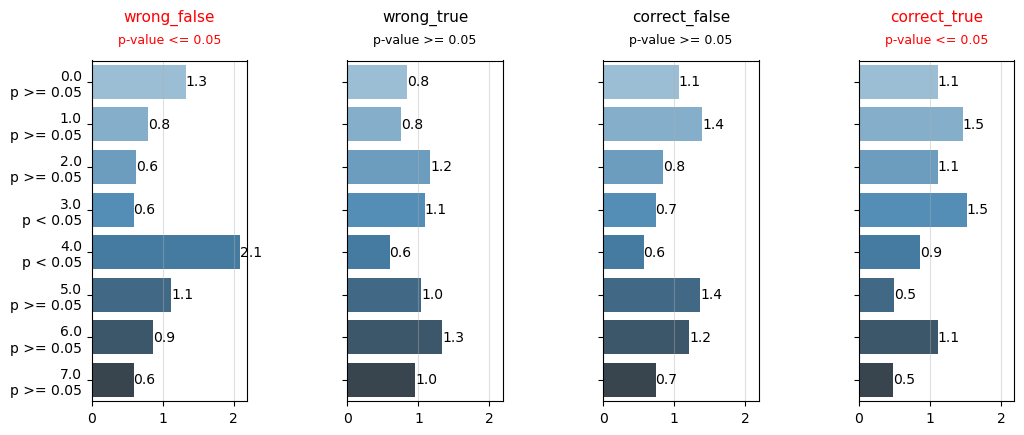

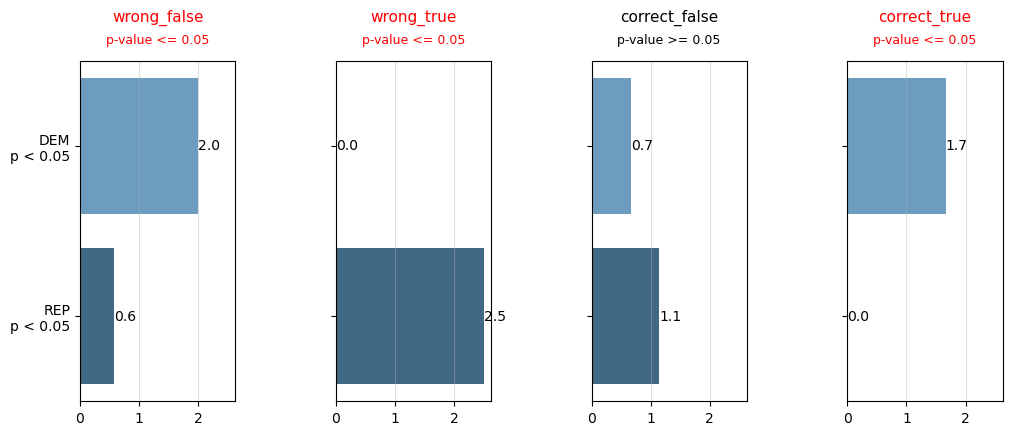

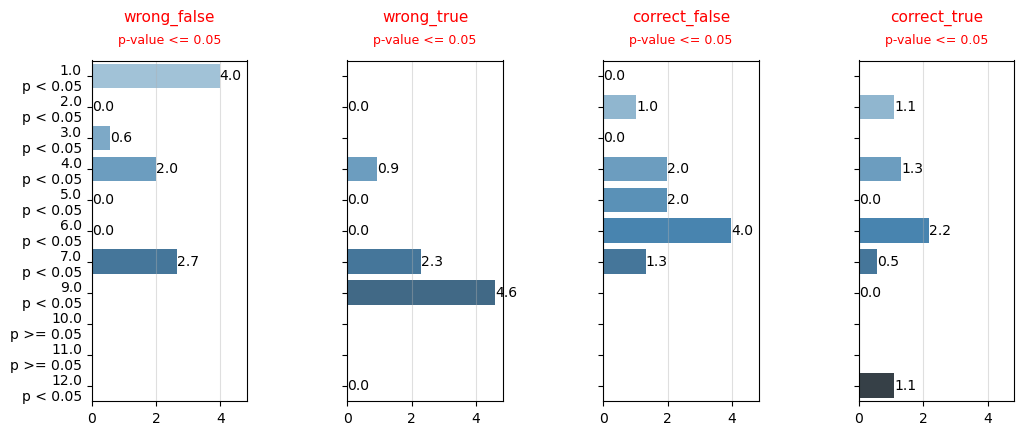

In [66]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue, dimensione,"label",inverted_axes = True)

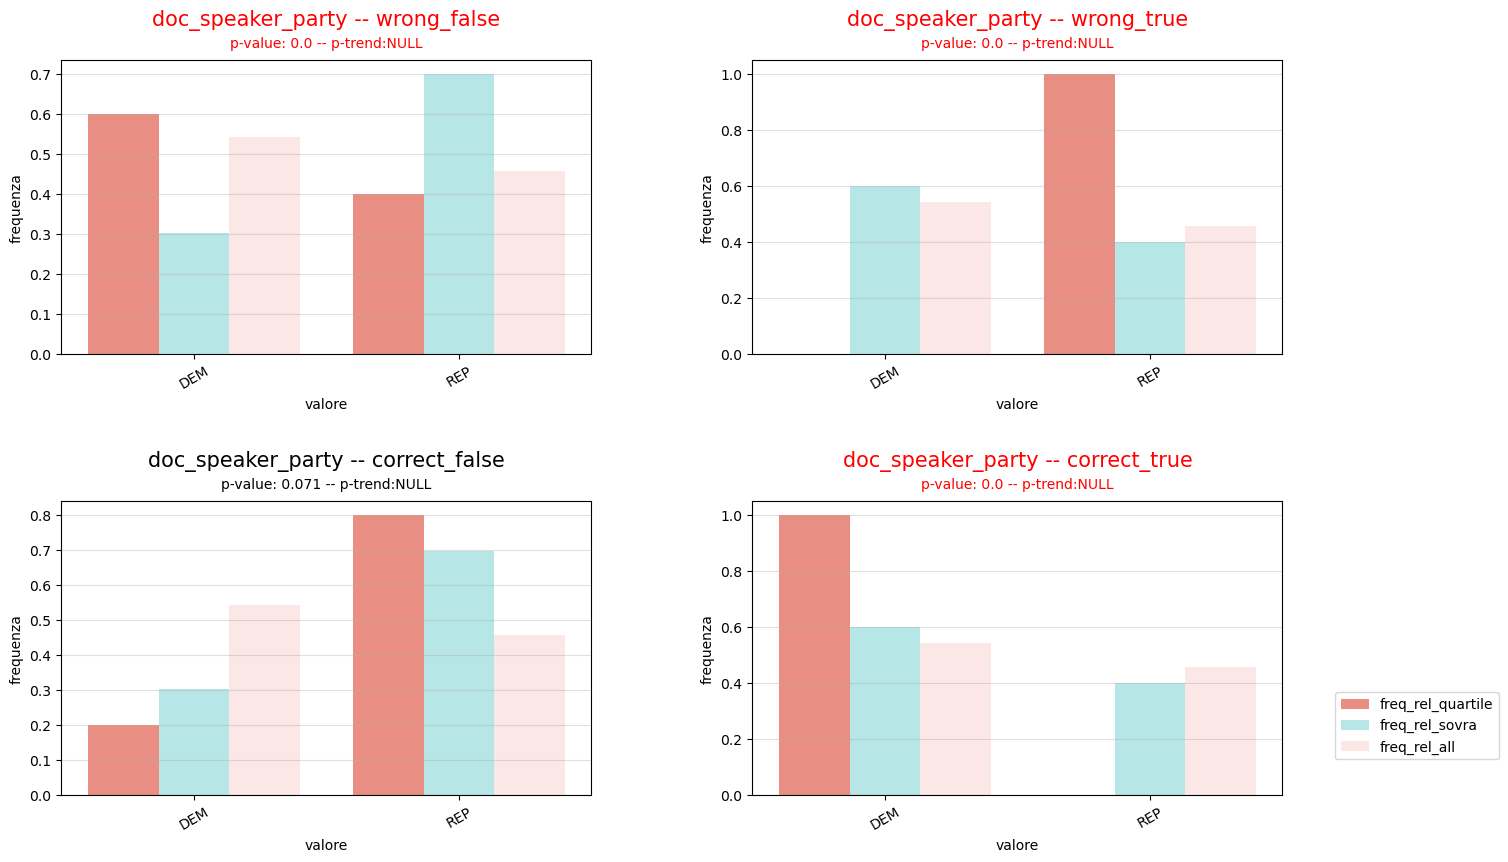

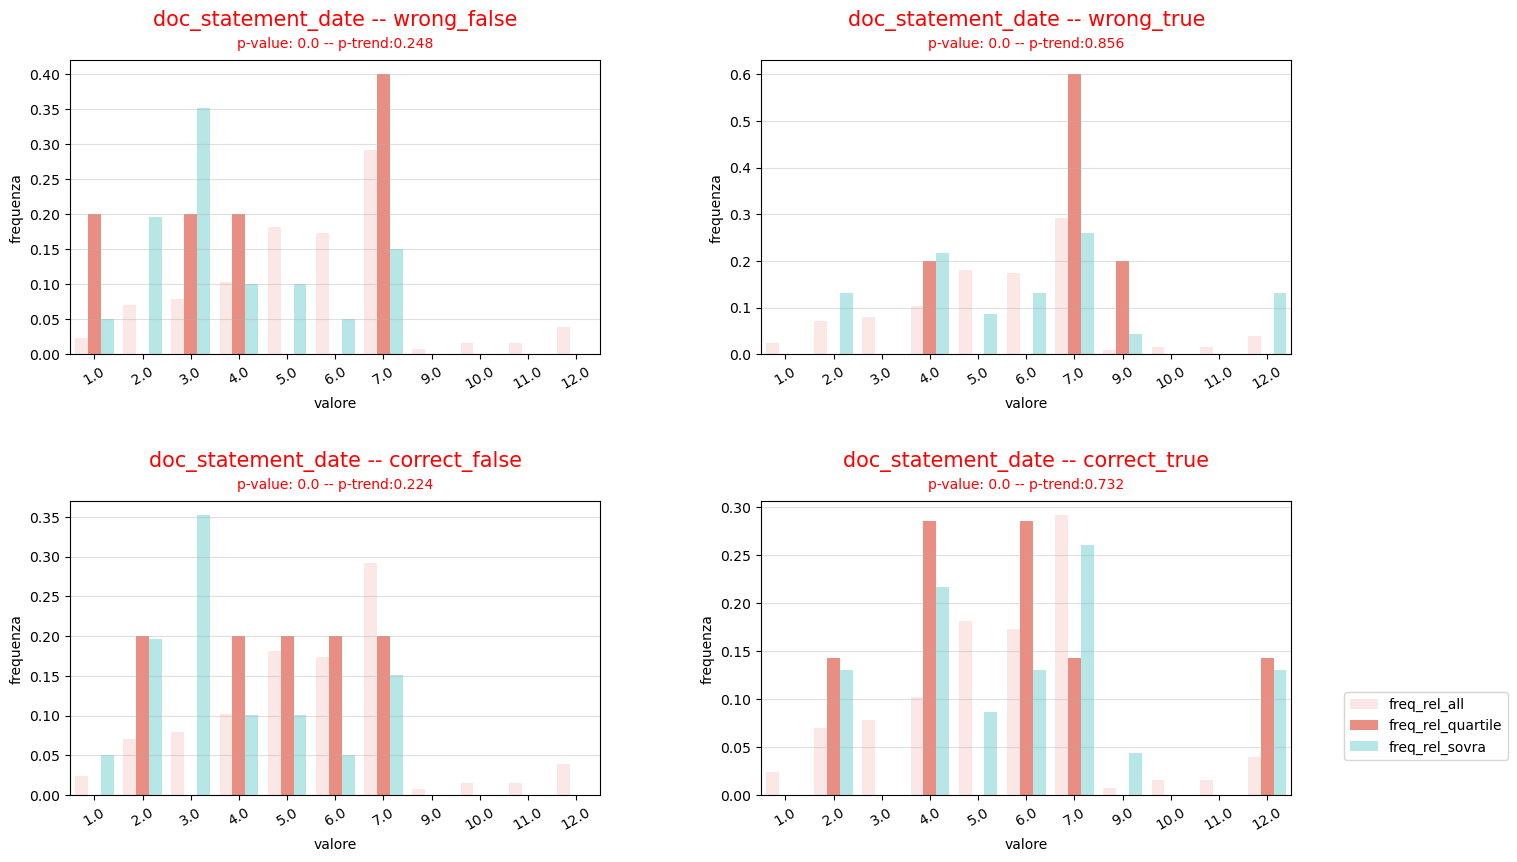

In [67]:
# solo significativi
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"valore")

## Confronto gruppi

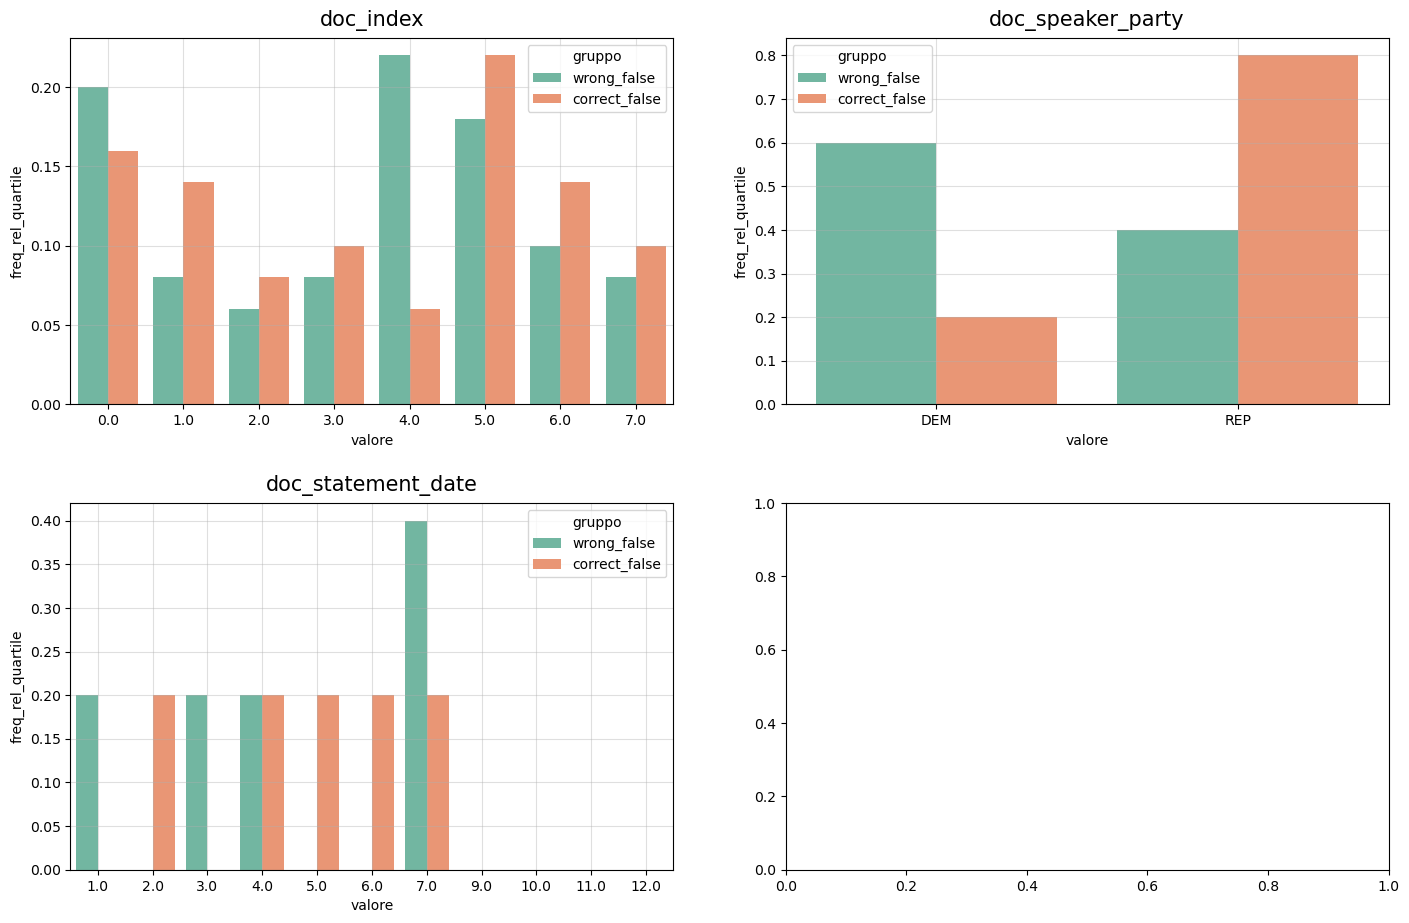

In [68]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False, numero_per_riga = 2)

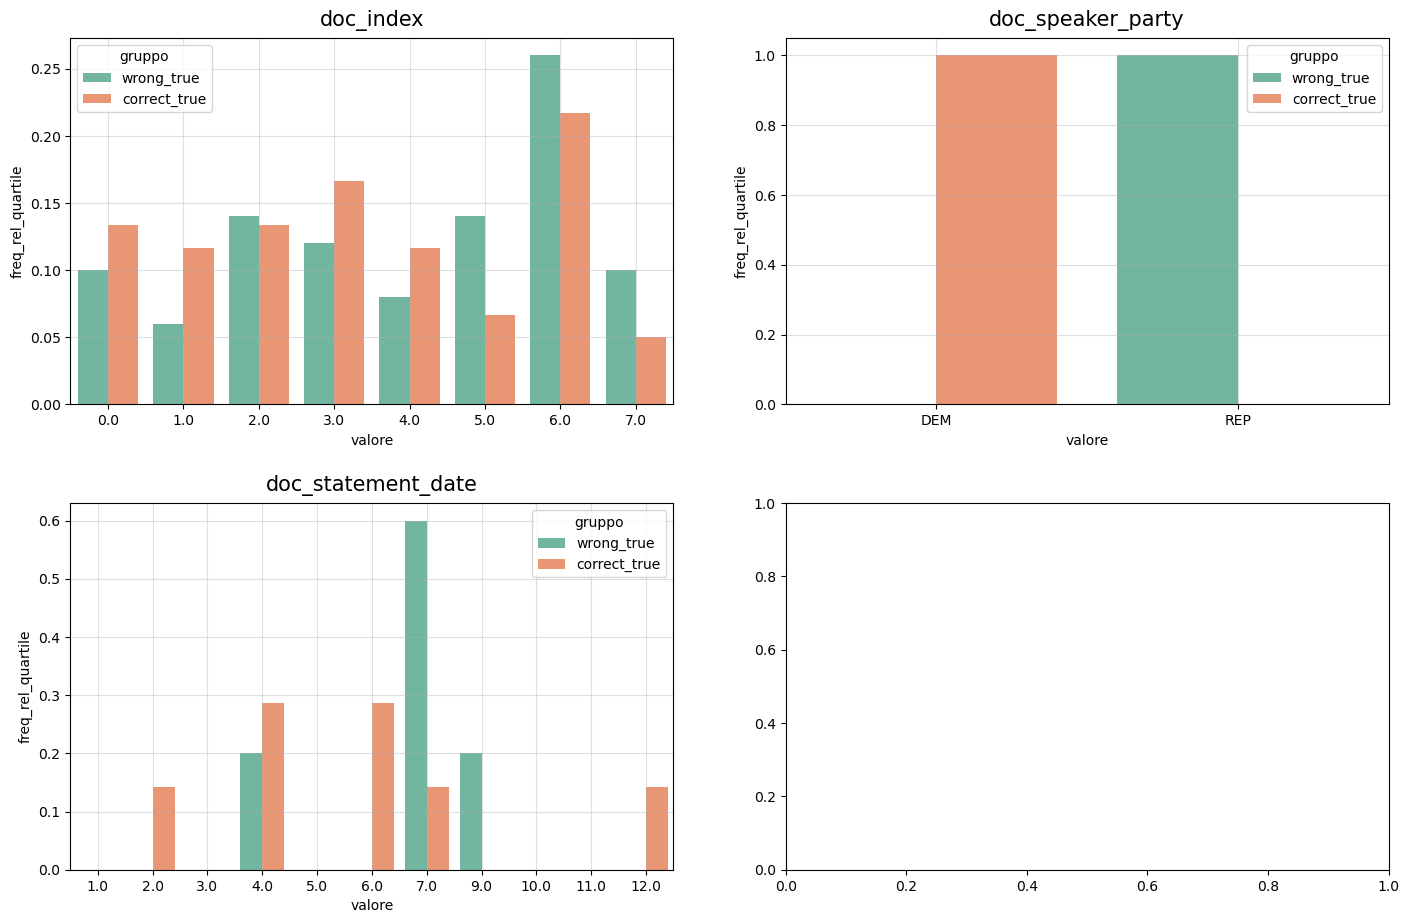

In [69]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False,numero_per_riga = 2)

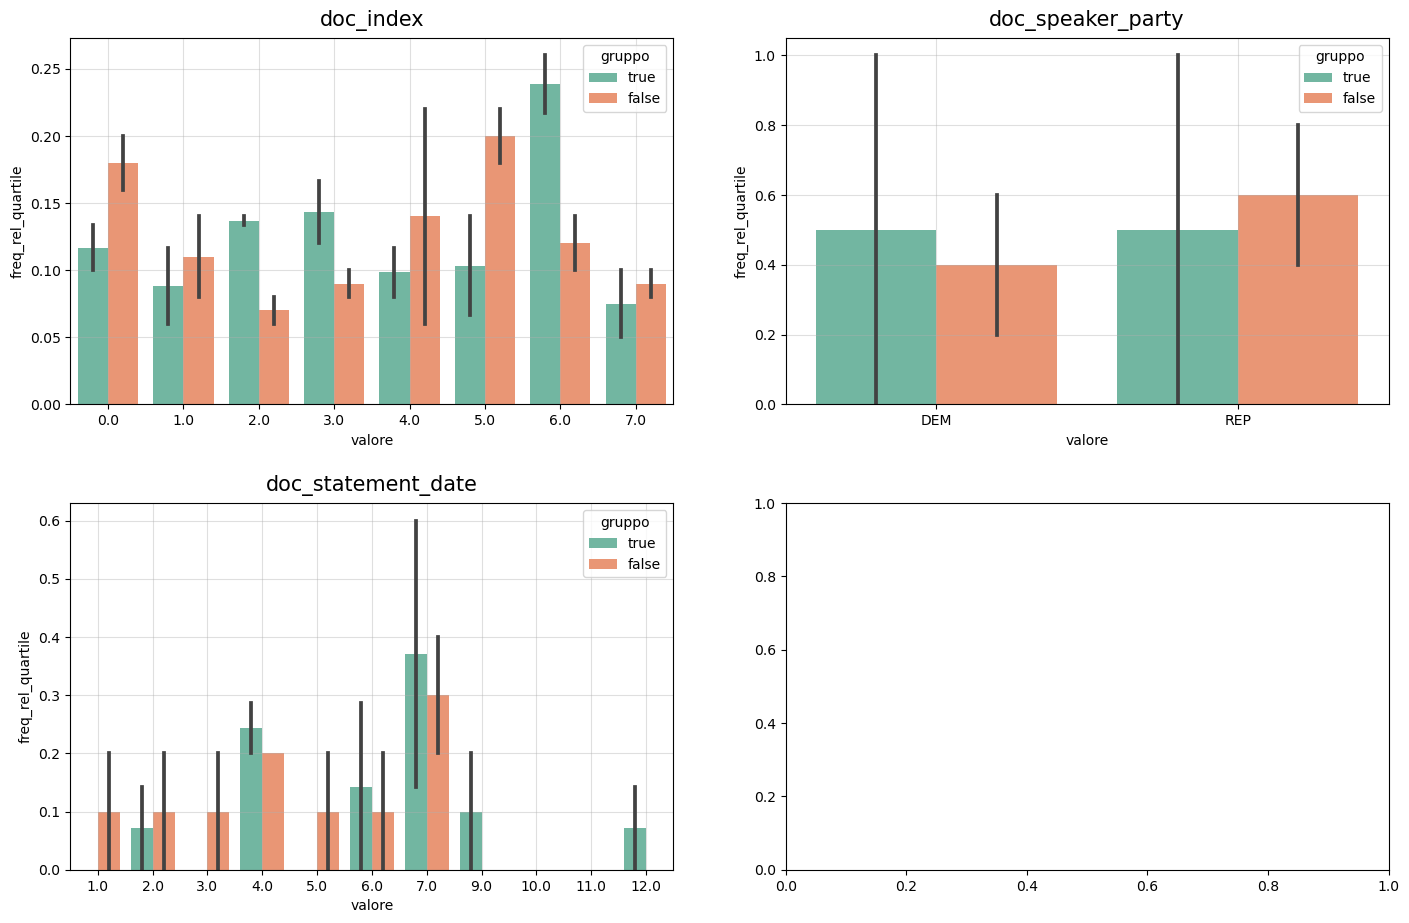

In [70]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["true","false"],numero_per_riga = 2)

In [71]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

true doc_index 0.013734855388193513
false doc_speaker_party 0.0028875740683071797
true doc_statement_date 5.633318416090961e-32
false doc_statement_date 3.496566060030392e-08


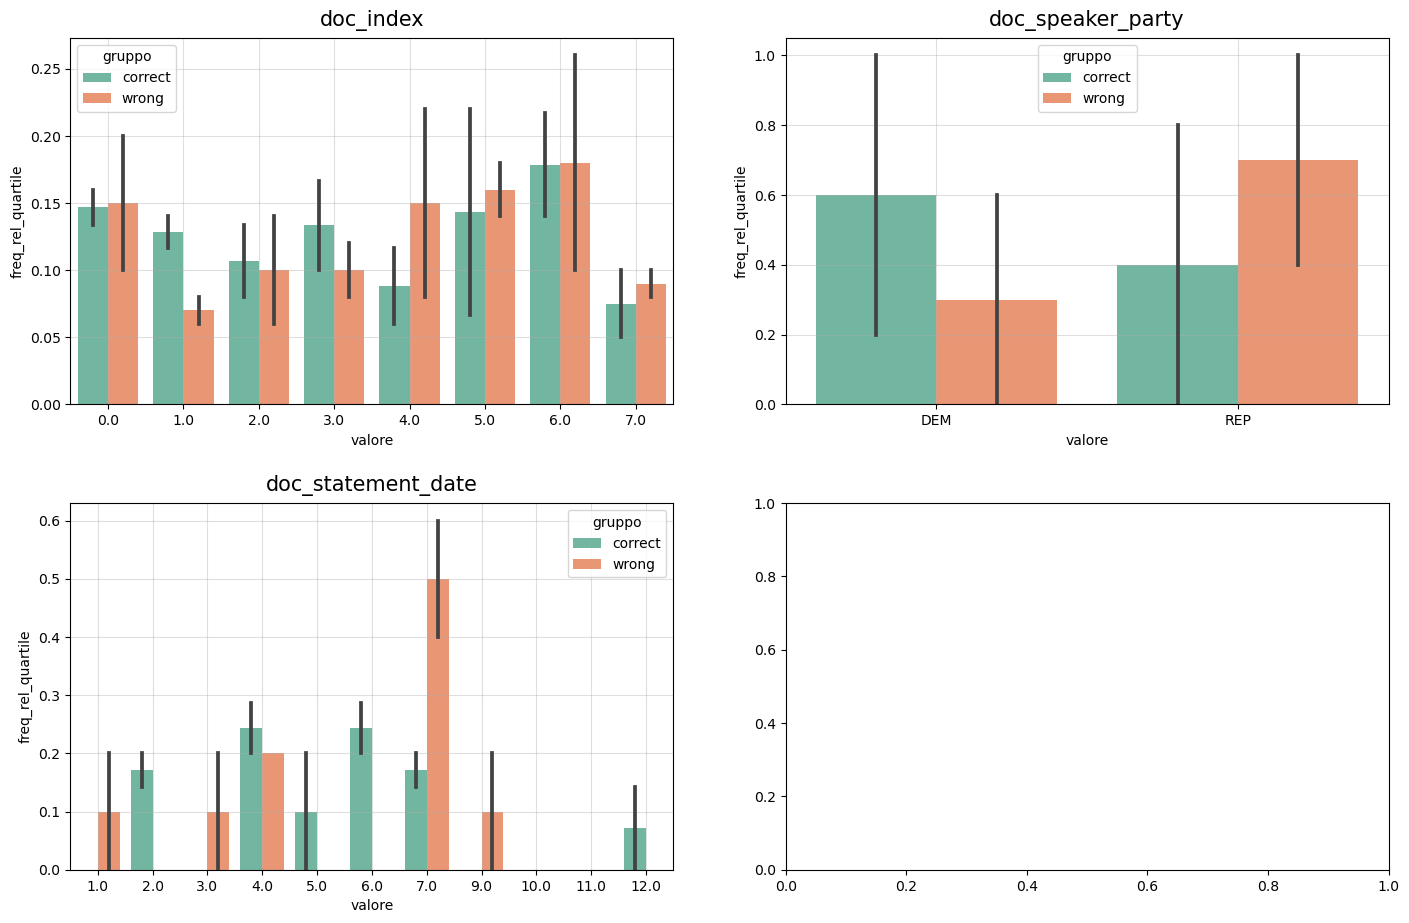

In [72]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["correct","wrong"],numero_per_riga = 2)

In [73]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

correct doc_speaker_party 0.03736574296026352
wrong doc_speaker_party 3.8562168969944933e-07
correct doc_statement_date 6.2560433020129024e-15
wrong doc_statement_date 1.3062944818499774e-42


Noto che la dimensione più interessante è doc_speaker_party

In [74]:
df_analisi[["doc_speaker_party","doc_truthfulness_index"]].groupby("doc_speaker_party").mean()

,doc_truthfulness_index
doc_speaker_party,
DEM,2.941538
REP,2.495446


In [75]:
def anova_for_appartence_to_group(variabili_indipendenti):

    for variabile_interesse in ["correct_false", "wrong_false"]:
        for df in [["df_all",df_all], ["df_false",df_false]]:
            
            results = ols(
                f'''
                    {variabile_interesse} ~ {variabili_indipendenti} """
                '''
                , data=df[1]).fit()
            aov_table = sm.stats.anova_lm(results, typ=2)
            anova_table_v = anova_table(aov_table)
            if anova_table_v["omega_sq"].max() > valore_soglia:
                print("-" * 100)
                print(f"""{variabile_interesse} ~ {variabili_indipendenti} in {df[0]}""")
                display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            for index, row in anova_table_v.iterrows():
                if row["omega_sq"] > valore_soglia:
                    print(index)
                    if index[0] == "C":
                        index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)
                    
                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
                    
    for variabile_interesse in ["correct_true", "wrong_true"]:
        for df in [["df_all",df_all], ["df_true",df_true]]:
            
            results = ols(
                f'''
                    {variabile_interesse} ~ {variabili_indipendenti}"""
                '''
                , data=df[1]).fit()
            aov_table = sm.stats.anova_lm(results, typ=2)
            anova_table_v = anova_table(aov_table)
            if anova_table_v["omega_sq"].max() > valore_soglia:
                print("-" * 100)
                print(f"""{variabile_interesse} ~ {variabili_indipendenti} in {df[0]}""")
                display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            for index, row in anova_table_v.iterrows():
                if row["omega_sq"] > valore_soglia:
                    print(index)
                    if index[0] == "C":
                        index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index],
                                            alpha=0.05)
                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

## Analisi del linguaggio naturale

### Distribuzione del numero di parole significative

    parole significative = parole che non sono stop word
    dizionario = inglese

In [76]:
import nltk
from nltk.corpus import stopwords

calcolo:
- numero parole frase => paole singole frase
- numero parole significative => parole che non sono stop word
- percentuale significative rispetto a totale

In [77]:
df_analisi["numero_parole_frase"] = 0
df_analisi["numero_parole_significative"] = 0
df_analisi["percentuale_parole_significative"] = 0

for frase in df_analisi["doc_statement_text"]:
    # Separa la frase in parole
    parole = frase.split()
    # Rimuovi le stopwords inglesi
    stopwords_eng = stopwords.words('english')
    parole_significative = [parola for parola in parole if parola.lower() not in stopwords_eng]
    # Calcola il numero di parole significative
    numero_parole_significative = len(parole_significative)
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "numero_parole_significative"] = numero_parole_significative
    
    lunghezza_frase = len(parole)
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "numero_parole_frase"] = lunghezza_frase
    
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "percentuale_parole_significative"] = numero_parole_significative/lunghezza_frase
    

In [78]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_analisi)

In [79]:
# poiche mi interessano solo gli statement, elimino i duplicati
df_analisi_statement = df_analisi.copy()
df_analisi_statement.drop_duplicates(subset ="doc_statement_text", keep = "first", inplace = True)

In [80]:
calcola_test_mann(df_analisi_statement, "numero_parole_frase",quartili)

['wrong_false'] ['correct_false' 'other_false'] --> pvalue:  0.2925230710554235
['correct_false'] ['wrong_false' 'other_false'] --> pvalue:  0.13591232518120486
['wrong_true'] ['other_true' 'correct_true'] --> pvalue:  0.7591904948172747
['correct_true'] ['other_true' 'wrong_true'] --> pvalue:  0.6790238901756285


In [81]:
def calcola_test_mann_modificato(df, col, quartili,gruppo_confronto = ["sovra","correctness","all"],solo_significativi = False):
    for quartile in quartili:
        
        for confronto in gruppo_confronto:
        
            if confronto == "sovra":
            
                # valori del quartile
                count = df[df["quartile"] == quartile][col]
                
                # nome del quartile
                group1 = df[df["quartile"] == quartile]["quartile"].unique()
                    
                if quartile == "correct_true" or quartile == "wrong_true":
                    sovra = "true"
                else:
                    sovra = "pants-on-fire"
                
                # nomi quartili sovrapposti
                group2 = df[(df["sovra"] == sovra)]["quartile"].unique()
                
                # valori quartili sovrapposti
                nobs = df[(df["sovra"] == sovra)][col]
            
            elif confronto == "correctness":
                
                # valori del quartile
                count = df[df["quartile"] == quartile][col]
                
                # nome del quartile
                group1 = df[df["quartile"] == quartile]["quartile"].unique()
                    
                if quartile == "correct_true" or quartile == "correct_false":
                    # nomi quartili sovrapposti
                    group2 = df[(df["quartile"] == "correct_true") | (df["quartile"] == "correct_false")]["quartile"].unique()
                    
                    # valori quartili sovrapposti
                    nobs = df[(df["quartile"] == "correct_true") | (df["quartile"] == "correct_false")][col]
                else:
                    # nomi quartili sovrapposti
                    group2 = df[(df["quartile"] == "wrong_true") | (df["quartile"] == "wrong_false")]["quartile"].unique()
                    
                    # valori quartili sovrapposti
                    nobs = df[(df["quartile"] == "wrong_true") | (df["quartile"] == "wrong_false")][col]
                
                
            elif confronto == "all":
                
                # valori del quartile
                count = df[df["quartile"] == quartile][col]
                
                # nome del quartile
                group1 = df[df["quartile"] == quartile]["quartile"].unique()
                    
                group2 = "[all]"
                    
                # valori quartili sovrapposti
                nobs = df[col]
            
            
                
            if solo_significativi:
                if test_mann_whitney_u(count,nobs) < 0.05:
                    print("-" * 100)
                    print("Test Mann: " + quartile + " vs " + confronto+ " -> dimensione = "+ col)
                    print(group1,group2,"--> pvalue:", round(test_mann_whitney_u(count,nobs),3))
            else:
                print("-" * 100)
                print("Test Mann: " + quartile + " vs " + confronto + " -> dimensione = "+ col)
                print(group1,group2,"--> pvalue: ", test_mann_whitney_u(count,nobs))

In [82]:
calcola_test_mann_modificato(df_analisi, "numero_parole_frase",quartili,gruppo_confronto=["sovra","correctness"],solo_significativi = True)

----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs sovra -> dimensione = numero_parole_frase
['wrong_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.005
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs sovra -> dimensione = numero_parole_frase
['correct_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.0


In [83]:
calcola_test_mann_modificato(df_analisi, "percentuale_parole_significative",quartili,gruppo_confronto=["sovra","correctness"],solo_significativi = True)

----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs sovra -> dimensione = percentuale_parole_significative
['wrong_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.003
----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs correctness -> dimensione = percentuale_parole_significative
['wrong_false'] ['wrong_false' 'wrong_true'] --> pvalue: 0.002
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs sovra -> dimensione = percentuale_parole_significative
['correct_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.0
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs correctness -> dimensione = percentuale_parole_significative
['correct_false'] ['correct_false

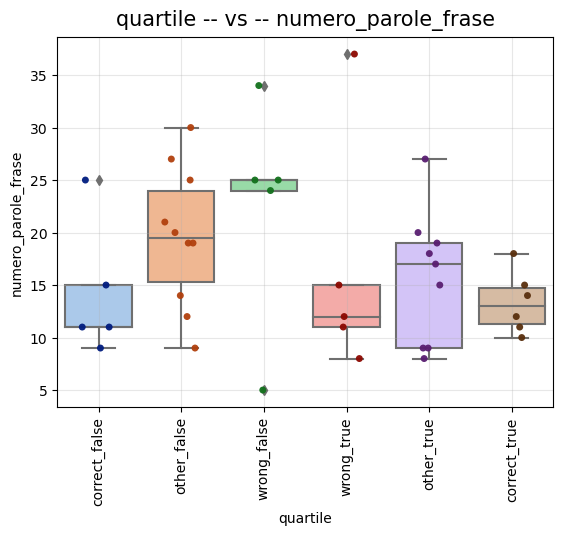

In [84]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "numero_parole_frase")

In [85]:
calcola_test_mann(df_analisi_statement, "numero_parole_frase",quartili)

['wrong_false'] ['correct_false' 'other_false'] --> pvalue:  0.2925230710554235
['correct_false'] ['wrong_false' 'other_false'] --> pvalue:  0.13591232518120486
['wrong_true'] ['other_true' 'correct_true'] --> pvalue:  0.7591904948172747
['correct_true'] ['other_true' 'wrong_true'] --> pvalue:  0.6790238901756285


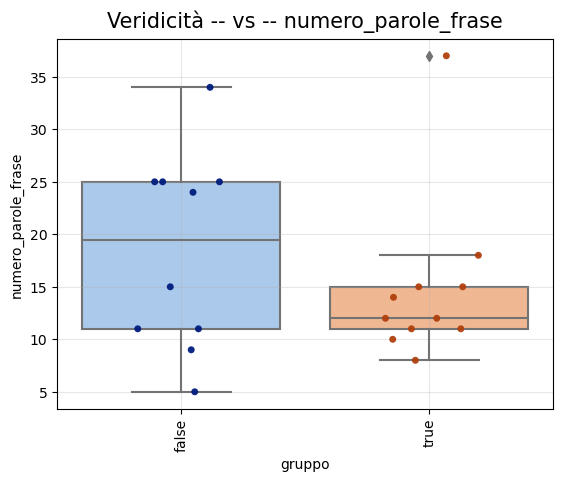

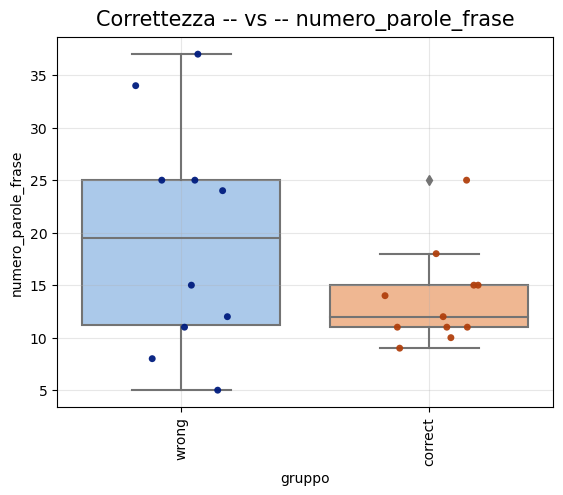

In [86]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "numero_parole_frase",gruppi = [["wrong_false", "correct_false"],["wrong_true", "correct_true"]],labels = ["false","true"],titolo = "Veridicità")
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "numero_parole_frase",gruppi = [["wrong_false", "wrong_true"],["correct_true", "correct_false"]],labels = ["wrong","correct"],titolo = "Correttezza")

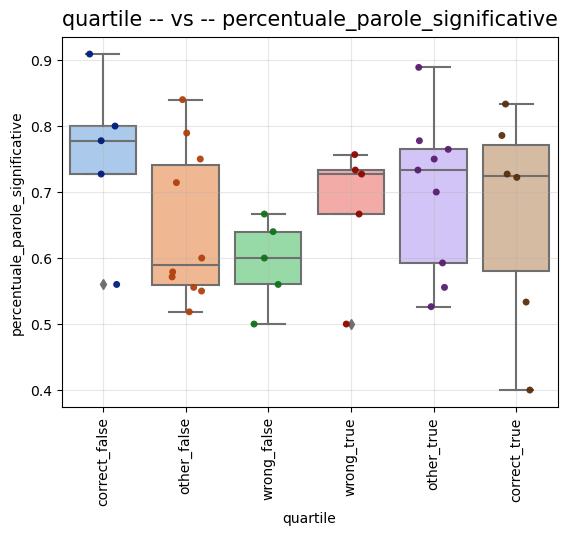

In [87]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "percentuale_parole_significative")

In [88]:
calcola_test_mann(df_analisi_statement, "percentuale_parole_significative",quartili)

['wrong_false'] ['correct_false' 'other_false'] --> pvalue:  0.2561293786566847
['correct_false'] ['wrong_false' 'other_false'] --> pvalue:  0.07333605145835306
['wrong_true'] ['other_true' 'correct_true'] --> pvalue:  0.6622822932247326
['correct_true'] ['other_true' 'wrong_true'] --> pvalue:  0.9342167596601569


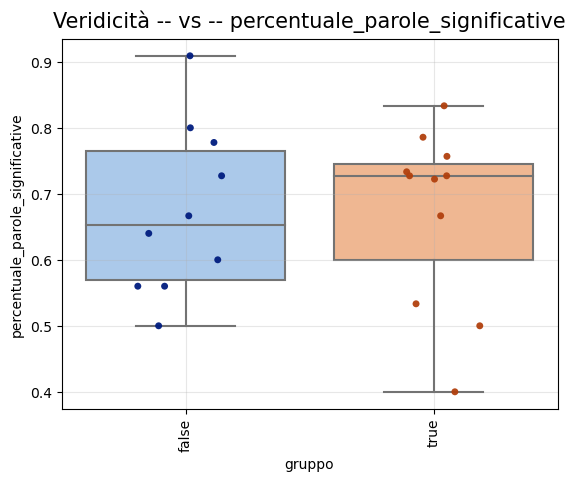

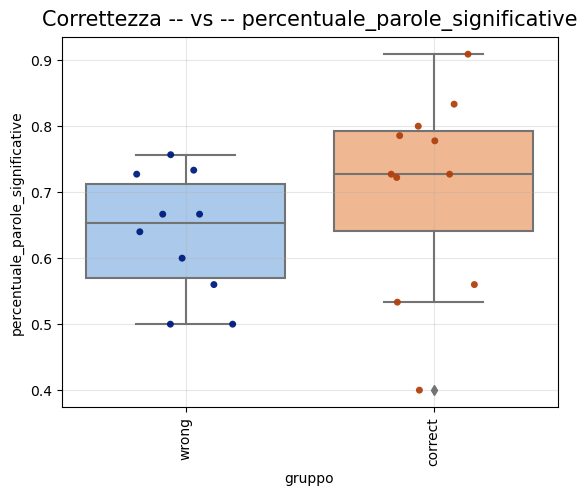

In [89]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "percentuale_parole_significative",gruppi = [["wrong_false", "correct_false"],["wrong_true", "correct_true"]],labels = ["false","true"],titolo = "Veridicità")
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "percentuale_parole_significative",gruppi = [["wrong_false", "wrong_true"],["correct_true", "correct_false"]],labels = ["wrong","correct"],titolo = "Correttezza")

### Distribuzione della leggibilit`a (FRE)

In [90]:
import textstat

In [91]:
df_analisi["fre"] = 0

for frase in df_analisi["doc_statement_text"]:
    fre = textstat.flesch_reading_ease(frase)
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "fre"] = fre
    

In [92]:
# poiche mi interessano solo gli statement, elimino i duplicati
df_analisi_statement = df_analisi.copy()
df_analisi_statement.drop_duplicates(subset ="doc_statement_text", keep = "first", inplace = True)

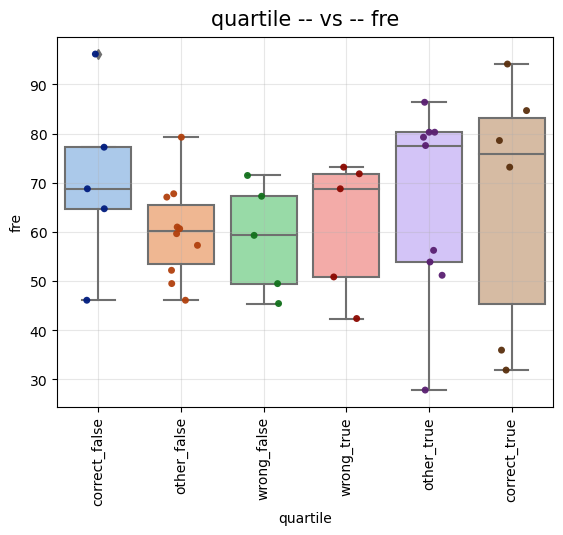

In [93]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "fre")

In [94]:
calcola_test_mann(df_analisi_statement, "fre",quartili)

['wrong_false'] ['correct_false' 'other_false'] --> pvalue:  0.4848271022156845
['correct_false'] ['wrong_false' 'other_false'] --> pvalue:  0.17590877328410437
['wrong_true'] ['other_true' 'correct_true'] --> pvalue:  0.2748723341063948
['correct_true'] ['other_true' 'wrong_true'] --> pvalue:  0.6798238825519876


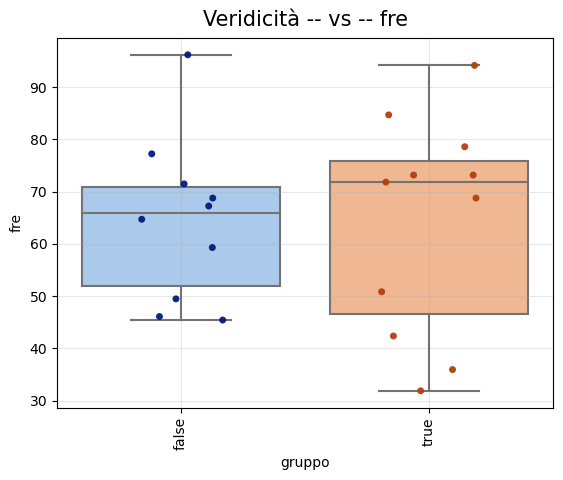

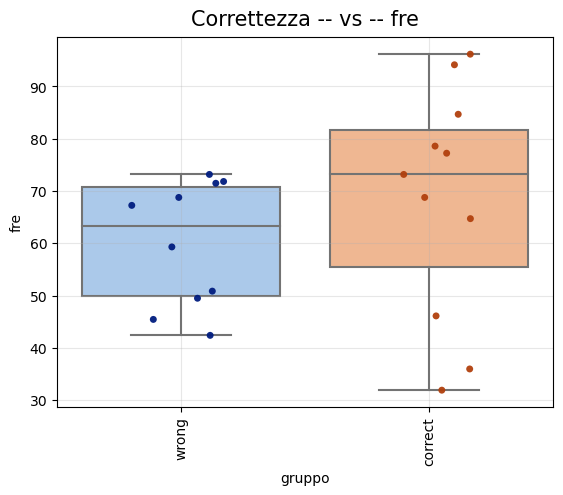

In [95]:
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "fre",gruppi = [["wrong_false", "correct_false"],["wrong_true", "correct_true"]],labels = ["false","true"],titolo = "Veridicità")
crea_boxplot_e_stripplot(df_analisi_statement, "quartile", "fre",gruppi = [["wrong_false", "wrong_true"],["correct_true", "correct_false"]],labels = ["wrong","correct"],titolo = "Correttezza")

### Rapporti tra frequenze relative dei valori del sentimento e soggettività

    sentiment:
    > 0 => positivo
    = 0 => neutro
    < 0 => negativo

    soggettività:
    0 => oggettivo
    1 => soggettivo

In [96]:
from textblob import TextBlob

In [97]:
# aggingo value

df_analisi["sentiment"] = 0
df_analisi["subjectivity"] = 0

for frase in df_analisi["doc_statement_text"]:
    sentiment = TextBlob(frase).sentiment.polarity
    subjectivity = TextBlob(frase).sentiment.subjectivity
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "sentiment"] = sentiment
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "subjectivity"] = subjectivity

df_analisi["sentiment_label"] = 0
df_analisi["subjectivity_label"] = 0


# aggiungo label in base al valore
for index, row in df_analisi.iterrows():
    if row["sentiment"] > 0:
        df_analisi.loc[index, "sentiment_label"] = "positive"
    elif row["sentiment"] == 0:
        df_analisi.loc[index, "sentiment_label"] = "neutral"
    else:
        df_analisi.loc[index, "sentiment_label"] = "negative"
        
    if row["subjectivity"] >= 0.80:
        df_analisi.loc[index, "subjectivity_label"] = "alta"
    elif row["subjectivity"] >= 0.60:
        df_analisi.loc[index, "subjectivity_label"] = "media-alta"
    elif row["subjectivity"] >= 0.40:
        df_analisi.loc[index, "subjectivity_label"] = "media"
    elif row["subjectivity"] >= 0.20:
        df_analisi.loc[index, "subjectivity_label"] = "media-bassa"
    else:
        df_analisi.loc[index, "subjectivity_label"] = "bassa"

In [98]:
dimensioni_da_analizzare = ["sentiment_label", "subjectivity_label"]
ordine_personalizzato = ["bassa","media-bassa","media","media-alta","alta"]

In [99]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_analisi, dimensioni_da_analizzare, quartili)

In [100]:
raccoglitore_dimensioni["sentiment_label"]["correct_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,negative,200,40,10,0.166806,0.201005,0.2
0,neutral,529,119,40,0.441201,0.597990,0.8
1,positive,470,40,0,0.391993,0.201005,0.0


In [101]:
mapping_per_ptrend = {
    "sentiment_label": {
        "negative" : -1,
        "neutral" : 0,
        "positive" : 1
        
    },
    "subjectivity_label": {
        "bassa" : 0,
        "media-bassa" : 1,
        "media" : 2,
        "media-alta" : 3,
        "alta" : 4
    
    }
}

In [102]:

tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili,usa_mapping = True, mapping_per_ptrend = mapping_per_ptrend)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
10,subjectivity_label,wrong_false,pvalue_quartile_sovra,0.000056,0.161594
16,subjectivity_label,wrong_true,pvalue_quartile_sovra,0.000103,0.637618
3,sentiment_label,correct_false,pvalue_quartile_sovra,0.000125,0.845579
19,subjectivity_label,correct_true,pvalue_quartile_sovra,0.001300,0.717686
13,subjectivity_label,correct_false,pvalue_quartile_sovra,0.003789,0.367701


In [103]:
upper_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    upper_pvalue[dimensione] = {}
    for quartile in quartili:
        upper_pvalue[dimensione][quartile] = False

# in alto
add_line = False
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        if add_line:
            print("\n")
            add_line = False

        for A in raccoglitore_dimensioni[dimensione][quartile]["valore"]:
            for B in raccoglitore_dimensioni[dimensione][quartile]["valore"]:
                if A != B:
                    successes = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == A]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == B]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == A]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["valore"] == B]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|",quartile,"|",A,"vs",B,"|","pvalue:",p)
                        add_line = True
                        upper_pvalue[dimensione][quartile] = True


sentiment_label | correct_false | negative vs positive | pvalue: 0.0007232327164301936
sentiment_label | correct_false | neutral vs positive | pvalue: 2.2502400611079936e-05
sentiment_label | correct_false | positive vs negative | pvalue: 0.0007232327164301936
sentiment_label | correct_false | positive vs neutral | pvalue: 2.2502400611079912e-05


subjectivity_label | wrong_false | alta vs media-alta | pvalue: 0.00882876095281863
subjectivity_label | wrong_false | alta vs media-bassa | pvalue: 0.012073797243122903
subjectivity_label | wrong_false | bassa vs media | pvalue: 0.009402633196782653
subjectivity_label | wrong_false | bassa vs media-alta | pvalue: 0.0004226824886438578
subjectivity_label | wrong_false | media vs bassa | pvalue: 0.009402633196782648
subjectivity_label | wrong_false | media vs media-alta | pvalue: 0.029096331741252267
subjectivity_label | wrong_false | media vs media-bassa | pvalue: 0.0007036458151333464
subjectivity_label | wrong_false | media-alta vs alta | p

In [104]:
inner_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    inner_pvalue[dimensione] = {}
    for val in raccoglitore_dimensioni[dimensione]["wrong_false"]["valore"]:
        inner_pvalue[dimensione][val] = False

# vicino a ogni label
add_line = False
for dimensione in dimensioni_da_analizzare:
    for label in raccoglitore_dimensioni[dimensione]["wrong_false"]["valore"]:
        if add_line:
            print("\n")
            add_line = False
        for q1 in quartili:
            for q2 in quartili:
                if q1 != q2:
                    successes = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["valore"] == label]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["valore"] == label]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["valore"] == label]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["valore"] == label]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|", label,"|", q1,"vs",q2,"|","pvalue:",p)
                        add_line = True
                        inner_pvalue[dimensione][label] = True

sentiment_label | positive | wrong_false vs correct_false | pvalue: 0.0007232327164301936
sentiment_label | positive | correct_false vs wrong_false | pvalue: 0.0007232327164301936
sentiment_label | positive | correct_false vs wrong_true | pvalue: 0.0008141073251402341
sentiment_label | positive | correct_false vs correct_true | pvalue: 6.025323467817952e-05
sentiment_label | positive | wrong_true vs correct_false | pvalue: 0.0008141073251402321
sentiment_label | positive | correct_true vs correct_false | pvalue: 6.025323467817952e-05


subjectivity_label | alta | wrong_false vs wrong_true | pvalue: 0.0026997960632601883
subjectivity_label | alta | wrong_false vs correct_true | pvalue: 0.0026997960632601883
subjectivity_label | alta | correct_false vs wrong_true | pvalue: 0.0026997960632601883
subjectivity_label | alta | correct_false vs correct_true | pvalue: 0.0026997960632601883
subjectivity_label | alta | wrong_true vs wrong_false | pvalue: 0.0026997960632601883
subjectivity_label |

In [105]:
raccoglitore_dimensioni["sentiment_label"]["correct_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,negative,200,40,10,0.166806,0.201005,0.2
0,neutral,529,119,40,0.441201,0.597990,0.8
1,positive,470,40,0,0.391993,0.201005,0.0


In [106]:
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        raccoglitore_dimensioni[dimensione][quartile]
        r = []
        for row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            if row[1]["freq_rel_sovra"] == 0:
                r.append(0)
            else:
                r.append(row[1]["freq_rel_quartile"]/row[1]["freq_rel_sovra"])
        raccoglitore_dimensioni[dimensione][quartile]["rapporto"] = r

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_sentiment_label.png}
\caption{Analisi frequenze relative della dimensione sentiment}
\label{cap:frequenze_relative_sentiment}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_subjectivity_label.png}
\caption{Analisi frequenze relative della dimensione subjectivity}
\label{cap:frequenze_relative_subjectivity}
\end{subfigure}


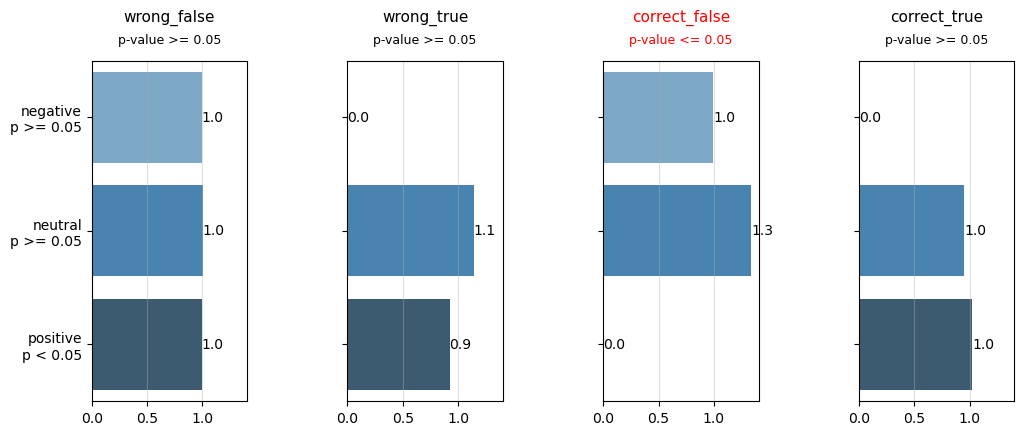

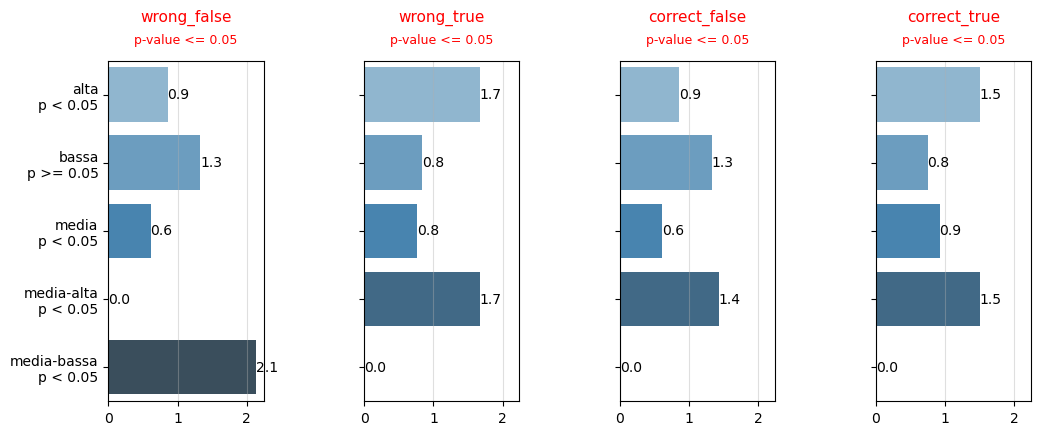

In [107]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue, dimensione,"label",inverted_axes = True)

In [108]:
#for dimensione in significativi["dimensione"].unique():
#    crea_barplot_quartili(raccoglitore_dimensioni, dimensione,"valore")

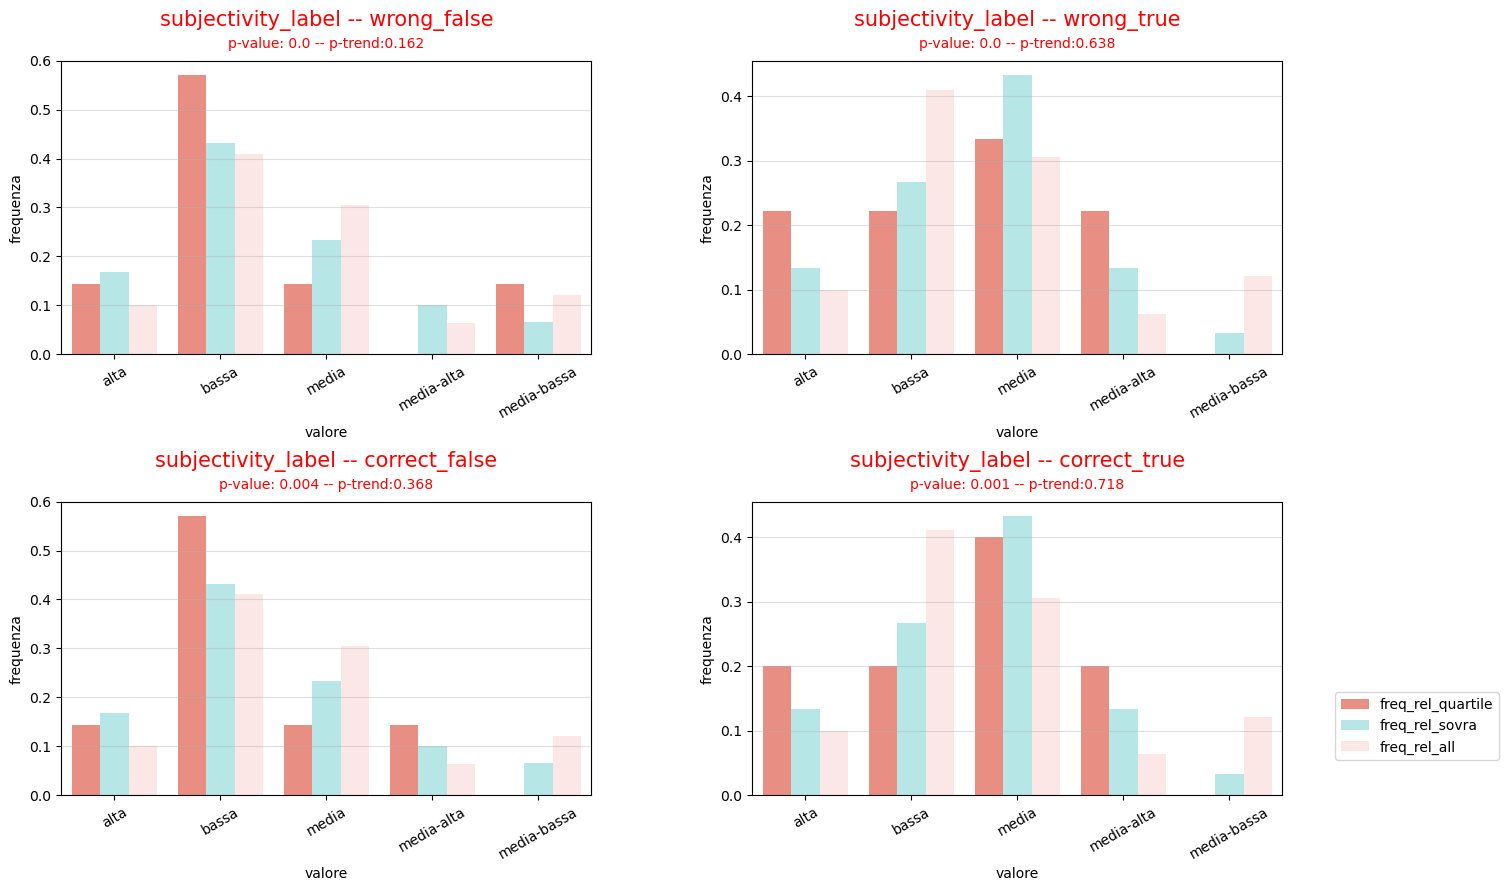

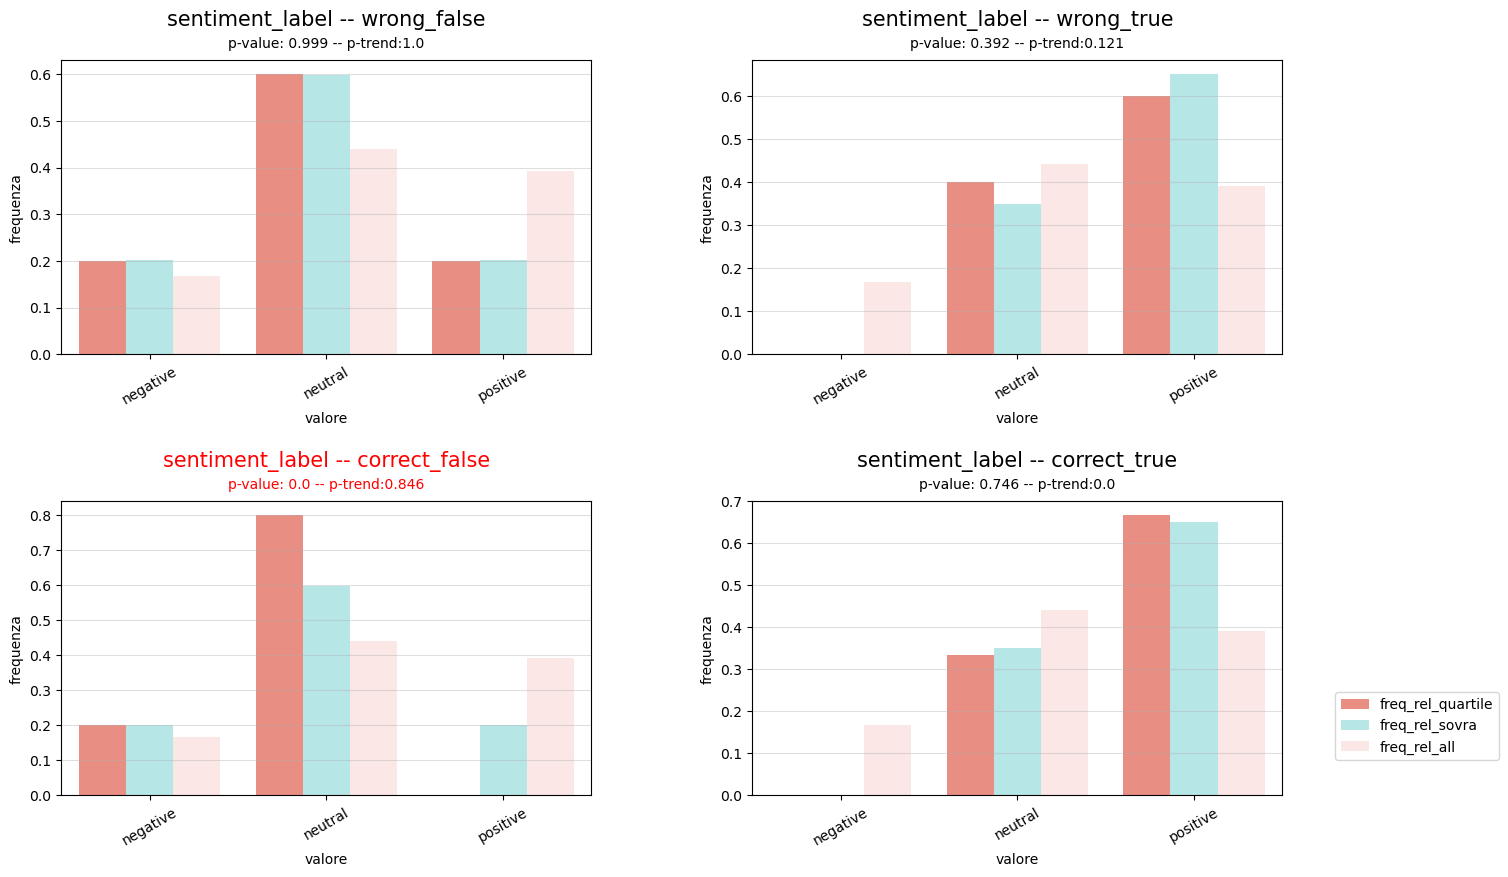

In [109]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"valore")

## Analisi regressione

In [110]:
dimensioni_da_analizzare = ["sentiment",
                            "subjectivity",
                            "numero_parole_frase",
                            "doc_index","doc_statement_date","fre"]

sentiment


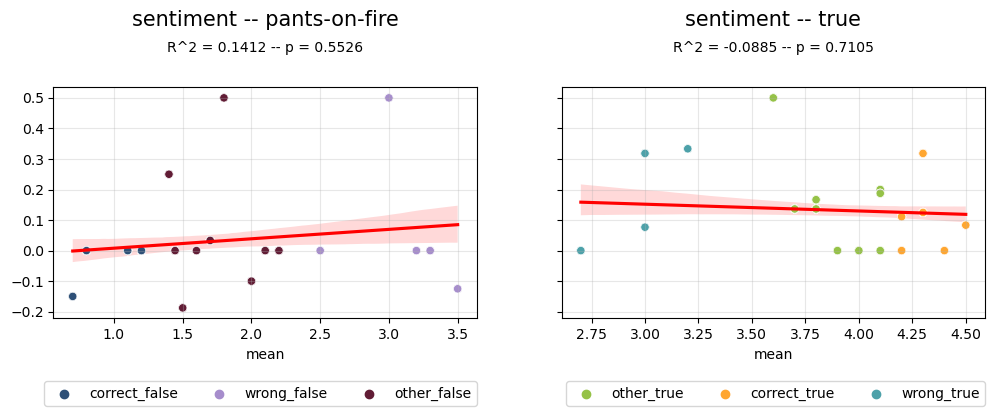

subjectivity


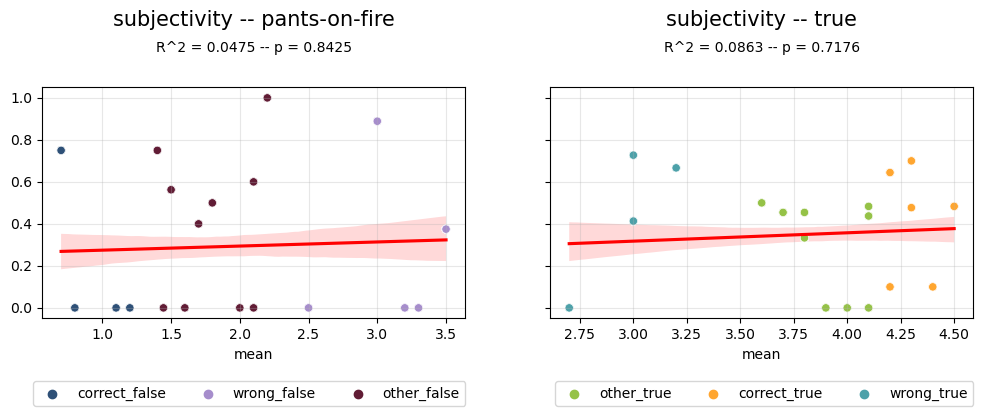

numero_parole_frase


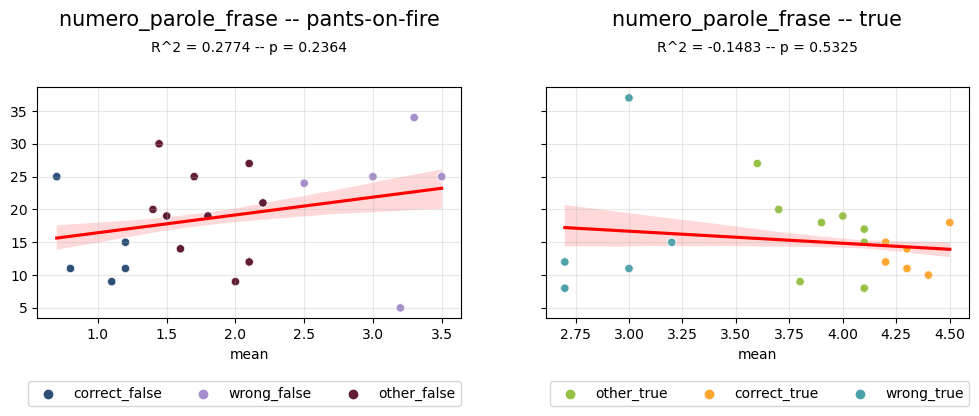

doc_index


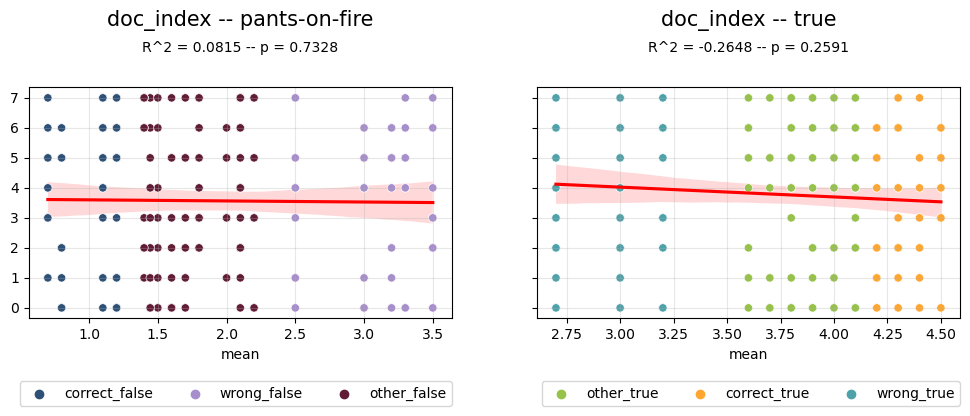

doc_statement_date


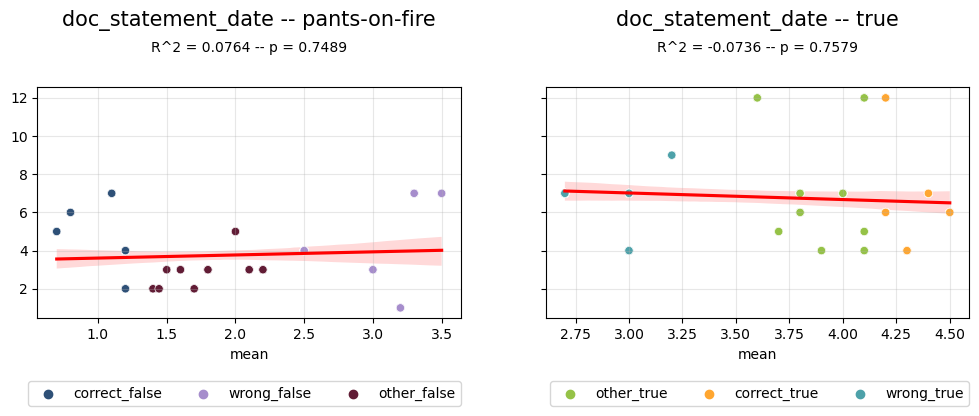

fre


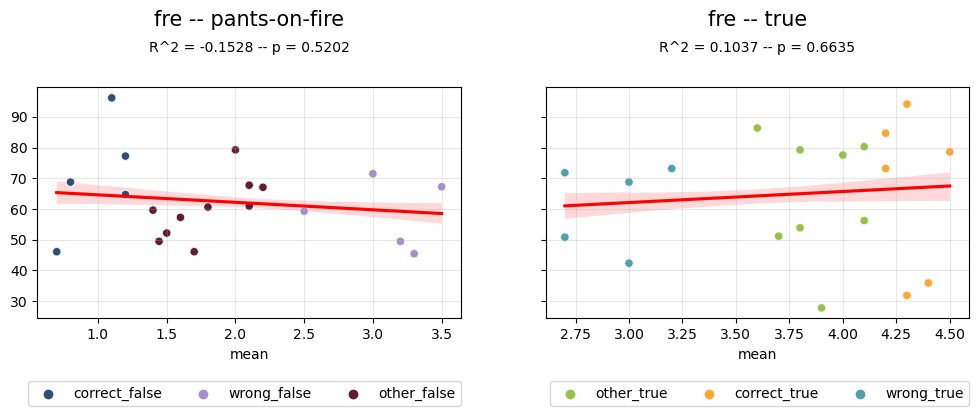

In [111]:
# senza mean
plot_regressione_lineare(df_analisi,dimensioni_da_analizzare)

In [112]:
df_analisi_con_mean = df_analisi.copy()
for dimensione in dimensioni_da_analizzare:
    print(dimensione[:-1]+"_mean")
    df_analisi_con_mean[dimensione[:-1]+"_mean"] = 0

for statement in df_analisi_con_mean["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_analisi_con_mean.loc[df_analisi_con_mean["doc_id"] == statement, dim[:-1]+"_mean"] = mean 

sentimen_mean
subjectivit_mean
numero_parole_fras_mean
doc_inde_mean
doc_statement_dat_mean
fr_mean


\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_sentiment.png}
\caption{Analisi di regressione lineare della dimensione sen}
\label{cap:regressione_lineare_sen}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_subjectivity.png}
\caption{Analisi di regressione lineare della dimensione subjec}
\label{cap:regressione_lineare_subjec}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_numero_parole_frase.png}
\caption{Analisi di regressione lineare della dimensione numero_parole}
\label{cap:regressione_lineare_numero_parole}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_doc_index.png}
\caption{Analisi di regressione lineare della dimensione doc}
\label{cap:regressione_linear

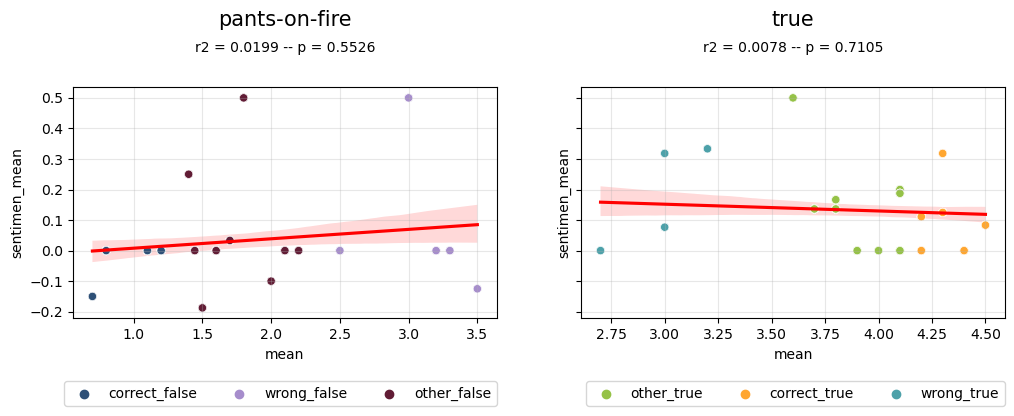

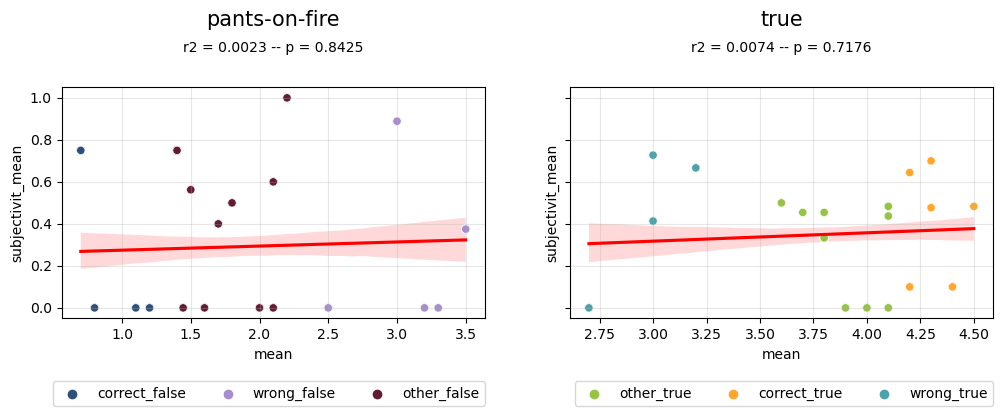

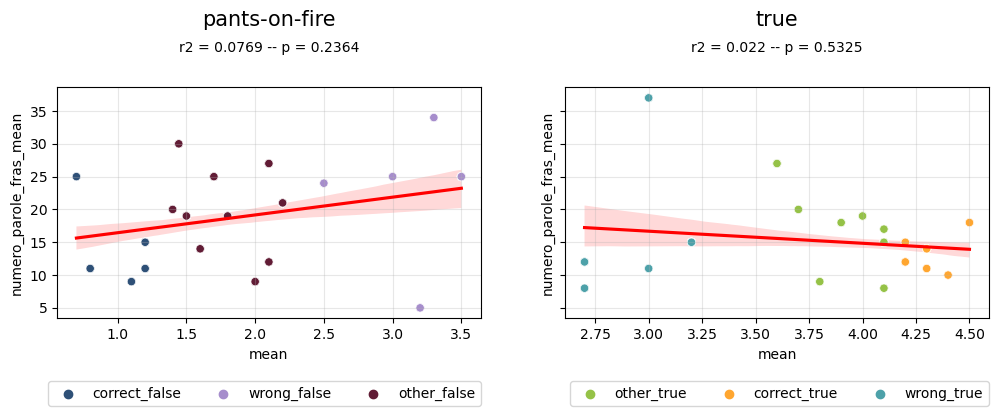

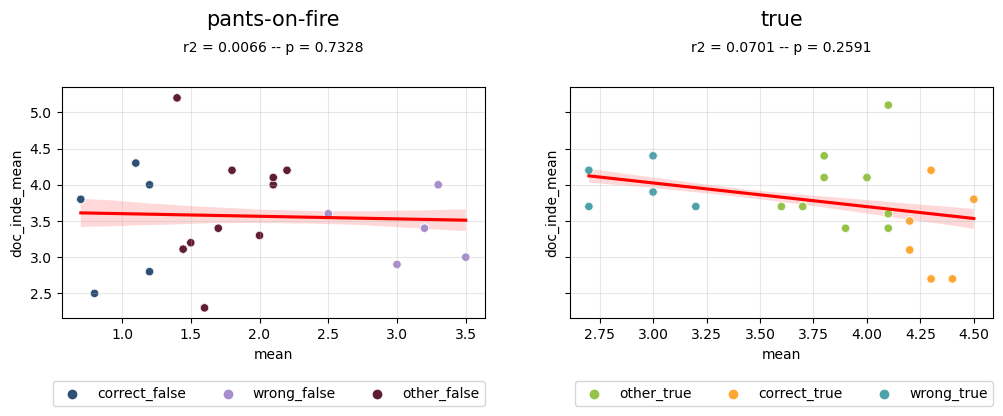

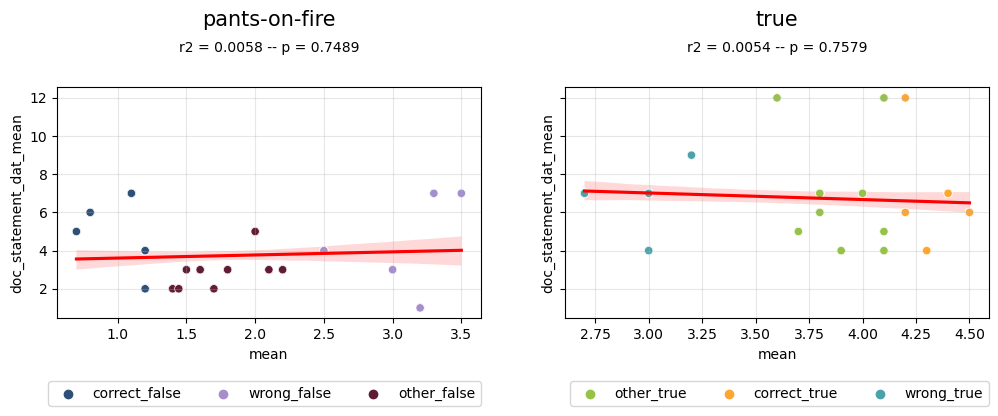

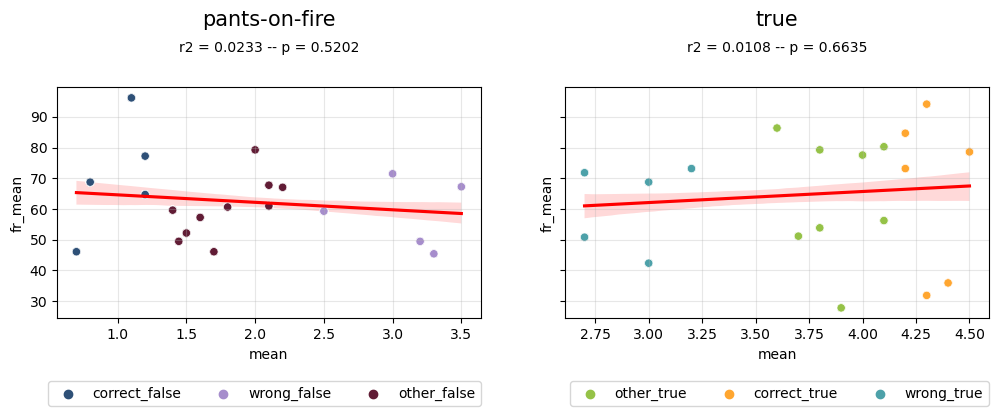

In [113]:
# con mean
plot_regressione_lineare_RQ(df_analisi_con_mean,dimensioni_da_analizzare,1)

## Analisi medie

In [114]:
# verifico se son tutti uguali => poichè son tutti uguali posso fare drop_by_doc_id
for doc_id in df_analisi_con_mean["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        if len(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id][dim].unique()) > 1:
            print(doc_id, dim)
    if len(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id]["quartile"].unique()) > 1:
        print(doc_id,df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id]["quartile"].unique())

joni-ernst-target-describing-11th-hour-obama-rule- doc_index
gop-challenger-overstates-parole-boards-record-und doc_index
greene-twists-logic-and-facts-pedophilia-charge-ag doc_index
barnes-partially-right-claim-johnson-has-received- doc_index
david-jolly-says-kathleen-peters-wont-take-stand-r doc_index
john-boehner-says-stimulus-bill-was-rushed-passage doc_index
ron-desantis-exaggerates-outstanding-graduate-stud doc_index
ohios-mandel-repeats-false-claim-stolen-2020-elect doc_index
lauren-boebert-wrong-founding-fathers-intent-exper doc_index
hard-pin-down-growing-cost-unused-border-materials doc_index
yes-tax-break-ron-johnson-pushed-2017-has-benefite doc_index
suozzi-calling-hochul-interim-governor-s-misleadin doc_index
fact-checking-claim-about-number-immigrants-becomi doc_index
nikki-frieds-ad-misleads-crists-position-abortion- doc_index
marjorie-taylor-greene-shared-edited-image-highlan doc_index
virginia-975-abortions-occur-15-weeks-pregnancy-or doc_index
susan-collins-says-year-

non sono uguali quinidi mi fermo

## Analisi scarto

In [115]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"] + ["numero_parole_significative", 
                            "fre",
                            "sentiment",
                            "subjectivity",
                            "numero_parole_frase"]

In [116]:
analizza_scarto(df_analisi,quartili,dimensioni_da_analizzare,solo_quartile_vs_sovra = True)

quartile vs sovra =>  doc_speaker_party wrong_true -> 0.017613387982186462


## Analisi bias

In [117]:
# doc_truthfulness_index

# confronto a sigolo vs tutti altri

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_analisi[dimensione].unique():
        group1 = df_analisi[df_analisi[dimensione] == value]["doc_truthfulness_index"]
        # tutti
        group2 = df_analisi[df_analisi[dimensione] != value]["doc_truthfulness_index"]
        p = test_mann_whitney_u(group1,group2)
        if p < 0.05:
            print(dimensione,value,p)

doc_speaker_party DEM 4.565785150836475e-06
doc_speaker_party REP 4.565785150836475e-06
doc_statement_date 4.0 0.002523857059023339
doc_statement_date 12.0 0.03191483507669884
doc_statement_date 2.0 1.8291881019995e-06
numero_parole_significative 10 0.0007681057002256079
numero_parole_significative 9 0.004158997614005592
numero_parole_significative 14 0.01601480166104866
numero_parole_significative 15 0.005737043531636827
numero_parole_significative 18 0.016223780174728742
fre 85.02 0.014582134324346453
fre 77.23 0.007207675196194772
fre 77.57 0.013738523694966264
fre 59.64 0.0002446194811783005
fre 60.31 0.015490931142116712
fre 46.1 0.0007331825617801705
fre 29.52 0.0004770056461583148
fre 64.71 0.0038362823403101723
fre 46.78 0.04139682971837982
fre 56.25 0.0069088723317487525
fre 43.39 0.04719463522886346
fre 78.59 0.0003932039542660512
fre 52.19 0.022334447357219064
fre 71.14 0.02978763335632958
fre 27.83 0.025037047378520954
fre 79.6 0.009082215571486271
fre 73.17 0.0111636240463

In [118]:
# doc_truthfulness_index

# confronto a coppie

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_analisi[dimensione].unique():
        group1 = df_analisi[df_analisi[dimensione] == value]["doc_truthfulness_index"]
        for value2 in df_analisi[dimensione].unique():
            if value != value2:
                group2 = df_analisi[df_analisi[dimensione] == value2]["doc_truthfulness_index"]
                p = test_mann_whitney_u(group1,group2)
                if p < 0.05:
                    print(dimensione,value,value2,p, "[",group1.mean(),group2.mean(),"]")


doc_speaker_party DEM REP 4.565785150836475e-06 [ 2.9415384615384617 2.495446265938069 ]
doc_speaker_party REP DEM 4.565785150836475e-06 [ 2.495446265938069 2.9415384615384617 ]
doc_statement_date 3.0 4.0 0.0011955466148185396 [ 2.42 3.1615384615384614 ]
doc_statement_date 3.0 12.0 0.005728039946953693 [ 2.42 3.24 ]
doc_statement_date 3.0 2.0 0.0020949013929864894 [ 2.42 1.435897435897436 ]
doc_statement_date 6.0 4.0 0.00886234086298026 [ 2.6363636363636362 3.1615384615384614 ]
doc_statement_date 6.0 12.0 0.028541838394619882 [ 2.6363636363636362 3.24 ]
doc_statement_date 6.0 2.0 5.720193322648154e-05 [ 2.6363636363636362 1.435897435897436 ]
doc_statement_date 4.0 3.0 0.0011955466148185396 [ 3.1615384615384614 2.42 ]
doc_statement_date 4.0 6.0 0.00886234086298026 [ 3.1615384615384614 2.6363636363636362 ]
doc_statement_date 4.0 5.0 0.03362375761328176 [ 3.1615384615384614 2.773913043478261 ]
doc_statement_date 4.0 7.0 0.020732530719122753 [ 3.1615384615384614 2.781081081081081 ]
doc_sta

In [119]:
dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in ["sentiment_label"]:
    print(df_analisi[[dimensione,"doc_truthfulness_index"]].groupby(dimensione).mean())

                 doc_truthfulness_index
sentiment_label                        
negative                       2.505000
neutral                        2.741021
positive                       2.831915


# Analisi parole

In [120]:
testi = df_analisi["doc_statement_text"].str.cat(sep=' ')
lista_parole = testi.split() 

In [121]:
import re

# tolgo cose che non sono lettere

for i in range(len(lista_parole)):
    lista_parole[i] = re.sub(r'[^a-zA-Z]', '', lista_parole[i]) 

lista_parole 

['The',
 'Obama',
 'administration',
 'issued',
 'an',
 'thhour',
 'rule',
 'that',
 'entrenches',
 'federal',
 'family',
 'planning',
 'funding',
 'for',
 'Planned',
 'Parenthood',
 'Weve',
 'got',
 'a',
 'parole',
 'board',
 'right',
 'now',
 'that',
 'has',
 'released',
 '',
 'cop',
 'killers',
 'in',
 'the',
 'last',
 'two',
 'years',
 'under',
 'Hochul',
 'Says',
 'Sens',
 'Lisa',
 'Murkowski',
 'Susan',
 'Collins',
 'and',
 'Mitt',
 'Romney',
 'are',
 'propedophile',
 'Says',
 'US',
 'Sen',
 'Ron',
 'Johnson',
 'his',
 'prospective',
 'opponent',
 'has',
 'received',
 '',
 'million',
 'from',
 'the',
 'gun',
 'lobby',
 'Kathleen',
 'Peters',
 'refuses',
 'to',
 'take',
 'a',
 'stand',
 'to',
 'repeal',
 'Obamacare',
 'Members',
 'of',
 'Congress',
 'did',
 'not',
 'have',
 'three',
 'days',
 'to',
 'read',
 'the',
 'bill',
 'when',
 'the',
 'stimulus',
 'was',
 'rushed',
 'into',
 'law',
 'The',
 'student',
 'debt',
 'that',
 'is',
 'out',
 'there',
 'almost',
 '',
 'of',
 'it',


In [122]:
# inizializzo dizionario
frequenza_parole = {}

for parola in lista_parole:
    frequenza_parole[parola] = { "pants-on-fire" : [0,0,0],
                                 "other":  [0,0,0],
                                 "true":  [0,0,0],
                                 "wrong_false":  [0,0,0],
                                 "other_false": [0,0,0],
                                 "correct_false":  [0,0,0],
                                 "wrong_true":  [0,0,0],
                                 "other_true":  [0,0,0],
                                 "correct_true":  [0,0,0],
                                 "all" : [0,0,0],
        
    }

In [123]:
# riempio dizionario

for index, row in df_analisi.iterrows():
    
    for parola in row["doc_statement_text"].split():
        parola = re.sub(r'[^a-zA-Z]', '', parola)
        frequenza_parole[parola]["all"][0] += 1  
        if row["sovra"] == "true":
            
            # frequenza assoluta
            frequenza_parole[parola]["true"][0] += 1
            frequenza_parole[parola][row["quartile"]][0] += 1
            # frequenza relativa
            frequenza_parole[parola]["true"][1] = frequenza_parole[parola]["true"][0] / frequenza_parole[parola]["all"][0]
            frequenza_parole[parola][row["quartile"]][1] = frequenza_parole[parola][row["quartile"]][0] / frequenza_parole[parola]["all"][0]
            
        elif row["sovra"] == "pants-on-fire":
            # frequenza assoluta
            frequenza_parole[parola]["pants-on-fire"][0] += 1
            frequenza_parole[parola][row["quartile"]][0] += 1
            # frequenza relativa
            frequenza_parole[parola]["pants-on-fire"][1] = frequenza_parole[parola]["pants-on-fire"][0] / frequenza_parole[parola]["all"][0]
            frequenza_parole[parola][row["quartile"]][1] = frequenza_parole[parola][row["quartile"]][0] / frequenza_parole[parola]["all"][0]
            
        else:
            frequenza_parole[parola]["other"][0] += 1
            frequenza_parole[parola]["other"][1] = frequenza_parole[parola]["other"][0] / frequenza_parole[parola]["all"][0]
            





In [124]:
for parola in frequenza_parole.keys():
    for quartile in frequenza_parole[parola].keys() :
        if quartile != "all":
            if quartile == "pants-on-fire" or quartile == "true":
                frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola)) & (df_analisi["sovra"] == quartile)]["doc_truthfulness_index"].mean()
            else:
                frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola)) & (df_analisi["quartile"] == quartile)]["doc_truthfulness_index"].mean()
        else:
            frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola))]["doc_truthfulness_index"].mean()

In [125]:
interessanti = {}

for parola in lista_parole:
    for quartile in ["wrong_false","correct_false","wrong_true","correct_true"] :
        if frequenza_parole[parola][quartile][1] > 0.5 and frequenza_parole[parola][quartile][0] > 10:
            interessanti[parola] = [frequenza_parole[parola][quartile][1],frequenza_parole[parola][quartile][0],quartile, frequenza_parole[parola][quartile][2]]

CI sono parole che compaiono solo nei quartili o che compaiono nella loro interezza

In [126]:
interessanti

{'items': [1.0, 20, 'wrong_true', 3.0],
 'Schimel': [1.0, 20, 'wrong_true', 3.0],
 'taking': [0.6666666666666666, 20, 'wrong_true', 3.1],
 'likely': [0.6666666666666666, 20, 'correct_true', 4.35],
 'as': [0.7407407407407407, 20, 'correct_false', 0.8666666666666667],
 'die': [1.0, 20, 'correct_true', 4.35],
 'should': [0.5714285714285714, 20, 'wrong_false', 3.3],
 'Super': [1.0, 20, 'wrong_true', 3.2],
 'ask': [1.0, 20, 'wrong_false', 3.3],
 'permission': [1.0, 20, 'wrong_false', 3.3],
 'youre': [1.0, 20, 'correct_true', nan]}

## Salvo DataFrame

In [127]:
df_analisi.to_csv(index=False, path_or_buf = "../../Datasets/df_Q2.csv")

Analisi Anova 

In [128]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq']) 
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [129]:
df_analisi[["quartile","doc_index", "doc_speaker_party","doc_statement_date"]]

,quartile,doc_index,doc_speaker_party,doc_statement_date
0,other,6.0,DEM,3.0
1,other,7.0,DEM,6.0
2,correct_false,0.0,REP,4.0
3,other,2.0,DEM,5.0
4,other,3.0,DEM,7.0
...,...,...,...,...
1194,other,0.0,DEM,7.0
1195,other,1.0,REP,7.0
1196,wrong_true,3.0,REP,9.0
1197,other,4.0,REP,4.0


In [130]:
df_for_anova = df_analisi.copy()

In [131]:
variabili = ["quartile","doc_index", "doc_speaker_party","doc_statement_date"]
mapped_values = {}


for dim in variabili:
    mapped_values[dim] = {}
    i = 0
    for val in df_for_anova[dim].unique():
        print(dim,val)
        mapped_values[dim][val] = i
        i += 1

for index, row in df_for_anova.iterrows():
    for dim in variabili:
        df_for_anova.loc[index, dim+"_intero"] = mapped_values[dim][row[dim]]
    

    
    


quartile other
quartile correct_false
quartile other_true
quartile correct_true
quartile wrong_false
quartile wrong_true
quartile other_false
doc_index 6.0
doc_index 7.0
doc_index 0.0
doc_index 2.0
doc_index 3.0
doc_index 5.0
doc_index 1.0
doc_index 4.0
doc_speaker_party DEM
doc_speaker_party REP
doc_statement_date 3.0
doc_statement_date 6.0
doc_statement_date 4.0
doc_statement_date 5.0
doc_statement_date 7.0
doc_statement_date 1.0
doc_statement_date 12.0
doc_statement_date 2.0
doc_statement_date 10.0
doc_statement_date 11.0
doc_statement_date 9.0


In [132]:
df_for_anova[["quartile","doc_index", "doc_speaker_party","doc_statement_date",
              "quartile_intero","doc_index_intero", "doc_speaker_party_intero","doc_statement_date_intero"]]

,quartile,doc_index,doc_speaker_party,doc_statement_date,quartile_intero,doc_index_intero,doc_speaker_party_intero,doc_statement_date_intero
0,other,6.0,DEM,3.0,0.0,0.0,0.0,0.0
1,other,7.0,DEM,6.0,0.0,1.0,0.0,1.0
2,correct_false,0.0,REP,4.0,1.0,2.0,1.0,2.0
3,other,2.0,DEM,5.0,0.0,3.0,0.0,3.0
4,other,3.0,DEM,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...
1194,other,0.0,DEM,7.0,0.0,2.0,0.0,4.0
1195,other,1.0,REP,7.0,0.0,6.0,1.0,4.0
1196,wrong_true,3.0,REP,9.0,5.0,4.0,1.0,10.0
1197,other,4.0,REP,4.0,0.0,7.0,1.0,2.0


In [133]:
type(df_for_anova["doc_statement_date_intero"][0])

numpy.float64

In [134]:
df_for_anova = df_for_anova[["quartile","doc_index", "doc_speaker_party","doc_statement_date",
              "quartile_intero","doc_index_intero", "doc_speaker_party_intero","doc_statement_date_intero"]]

In [135]:
df_for_anova['doc_statement_date_intero'] = pd.to_numeric(df_for_anova["doc_statement_date_intero"])
df_for_anova['doc_index_intero'] = pd.to_numeric(df_for_anova["doc_index_intero"])
df_for_anova['doc_speaker_party_intero'] = pd.to_numeric(df_for_anova["doc_speaker_party_intero"])
df_for_anova['quartile_intero'] = pd.to_numeric(df_for_anova["quartile_intero"])

In [136]:
df_for_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quartile                   1199 non-null   object 
 1   doc_index                  1199 non-null   object 
 2   doc_speaker_party          1199 non-null   object 
 3   doc_statement_date         1199 non-null   object 
 4   quartile_intero            1199 non-null   float64
 5   doc_index_intero           1199 non-null   float64
 6   doc_speaker_party_intero   1199 non-null   float64
 7   doc_statement_date_intero  1199 non-null   float64
dtypes: float64(4), object(4)
memory usage: 75.1+ KB


In [137]:
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other"]
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other_true"]
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other_false"]


In [138]:
results = ols(
    '''
        quartile_intero ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),204.807141,8.0,25.600893,22.590530,3.757813e-24,0.455586,0.434324
C(doc_speaker_party),20.935911,1.0,20.935911,18.474095,2.729786e-05,0.046571,0.043940
C(doc_index),5.084448,7.0,0.726350,0.640940,7.216390e-01,0.011310,-0.006320
Residual,218.718743,193.0,1.133258,NaN,NaN,NaN,NaN


In [139]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_statement_date'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1.0,2.0,-3.0000,0.0000,-4.5428,-1.4572,True
3,1.0,5.0,-3.0000,0.0000,-4.5428,-1.4572,True
30,6.0,7.0,1.5238,0.0000,0.7710,2.2766,True
8,2.0,3.0,3.0000,0.0000,1.4572,4.5428,True
9,2.0,4.0,2.2000,0.0000,1.0050,3.3950,True
28,5.0,9.0,4.0000,0.0000,2.4572,5.5428,True
12,2.0,7.0,2.8571,0.0000,1.6909,4.0234,True
13,2.0,9.0,4.0000,0.0000,2.4572,5.5428,True
27,5.0,7.0,2.8571,0.0000,1.6909,4.0234,True
16,3.0,5.0,-3.0000,0.0000,-4.5428,-1.4572,True


In [140]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_speaker_party'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject


In [141]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_index'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject


In [142]:
df_for_anova["trimestre_pubblicazione"] = 0

for index, row in df_for_anova.iterrows():
    df_for_anova.loc[index, "trimestre_pubblicazione"] = int(row["doc_statement_date"])//4


In [143]:
results = ols(
    '''
        quartile_intero ~ C(doc_index) + C(doc_speaker_party) + C(trimestre_pubblicazione)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(trimestre_pubblicazione),29.671674,3.0,9.890558,4.972222,0.002389,0.068295,0.054311
C(doc_speaker_party),0.630746,1.0,0.630746,0.317091,0.573998,0.001452,-0.003112
C(doc_index),10.308686,7.0,1.472669,0.740346,0.638010,0.023727,-0.008284
Residual,393.854210,198.0,1.989163,NaN,NaN,NaN,NaN


In [144]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['trimestre_pubblicazione'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject
3,1,2,1.8125,0.0006,0.6296,2.9954,True
1,0,2,2.0000,0.0007,0.6749,3.3251,True
5,2,3,-2.0000,0.0088,-3.6229,-0.3771,True


In [145]:
results = ols(
    '''
        quartile_intero ~ C(doc_speaker_party) + C(trimestre_pubblicazione)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(trimestre_pubblicazione),30.291650,3.0,10.097217,5.121523,0.001948,0.069689,0.055829
C(doc_speaker_party),0.212104,1.0,0.212104,0.107584,0.743247,0.000488,-0.004029
Residual,404.162896,205.0,1.971526,NaN,NaN,NaN,NaN


In [146]:
df_for_anova["quartile"].unique()

array(['correct_false', 'correct_true', 'wrong_false', 'wrong_true'],
      dtype=object)

In [147]:
## analisi dei singoli gruppi

df_for_anova = df_all.copy()

df_for_anova["correct_false"] = 0
df_for_anova["correct_true"] = 0
df_for_anova["wrong_false"] = 0
df_for_anova["wrong_true"] = 0

for index, row in df_for_anova.iterrows():
    for dim in variabili:
        if row ["quartile"] == "correct_false":
            df_for_anova.loc[index, "correct_false"] = 1
        if row ["quartile"] == "correct_true":
            df_for_anova.loc[index, "correct_true"] = 1
        if row ["quartile"] == "wrong_false":
            df_for_anova.loc[index, "wrong_false"] = 1
        if row ["quartile"] == "wrong_true":
            df_for_anova.loc[index, "wrong_true"] = 1
        
            
        
        
        


In [148]:
for quartile in ["correct_false", "correct_true", "wrong_false", "wrong_true"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),1.834954,10.0,0.183495,4.830562,7.647897e-07,0.038759,0.030710
C(doc_speaker_party),0.470501,1.0,0.470501,12.386062,4.490219e-04,0.009938,0.009128
C(doc_index),0.213752,7.0,0.030536,0.803869,5.840817e-01,0.004515,-0.001101
Residual,44.823887,1180.0,0.037986,NaN,NaN,NaN,NaN


correct_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),4.094580,10.0,0.409458,9.673465,1.191378e-15,0.071963,0.064476
C(doc_speaker_party),2.538267,1.0,2.538267,59.966690,2.066230e-14,0.044610,0.043834
C(doc_index),0.318762,7.0,0.045537,1.075823,3.765519e-01,0.005602,0.000395
Residual,49.946988,1180.0,0.042328,NaN,NaN,NaN,NaN


wrong_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),10.633160,10.0,1.063316,34.104108,1.176681e-58,0.222528,0.215862
C(doc_index),0.356886,7.0,0.050984,1.635219,1.214952e-01,0.007469,0.002899
C(doc_speaker_party),0.002761,1.0,0.002761,0.088552,7.660787e-01,0.000058,-0.000594
Residual,36.790668,1180.0,0.031179,NaN,NaN,NaN,NaN


wrong_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),9.672393,10.0,0.967239,32.296686,1.149248e-55,0.208156,0.201581
C(doc_speaker_party),1.214974,1.0,1.214974,40.568690,2.714346e-10,0.026147,0.025486
C(doc_index),0.240343,7.0,0.034335,1.146454,3.312785e-01,0.005172,0.000660
Residual,35.339302,1180.0,0.029949,NaN,NaN,NaN,NaN


In [149]:
df_for_anova.columns[20:]

Index(['correct_false', 'wrong_true', 'correct_true', 'numero_parole_frase',
       'numero_parole_significative', 'percentuale_parole_significative'],
      dtype='object')

In [150]:
df_for_anova["sovra"]

0               other
1               other
2       pants-on-fire
3               other
4               other
            ...      
1194            other
1195            other
1196             true
1197            other
1198            other
Name: sovra, Length: 1199, dtype: object

In [151]:
for quartile in ["correct_false", "wrong_false"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova[df_for_anova["sovra"] == "pants-on-fire"]).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),12.760351,6.0,2.126725,16.980311,1.429990e-15,0.346729,0.325203
C(doc_speaker_party),0.405831,1.0,0.405831,3.240261,7.348729e-02,0.011027,0.007598
C(doc_index),0.590535,7.0,0.084362,0.673569,6.942770e-01,0.016046,-0.007750
Residual,23.045362,184.0,0.125247,NaN,NaN,NaN,NaN


wrong_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),11.307880,6.0,1.884647,18.192782,1.542679e-16,0.359147,0.338293
C(doc_index),0.938870,7.0,0.134124,1.294723,2.550947e-01,0.029819,0.006766
C(doc_speaker_party),0.177515,1.0,0.177515,1.713582,1.921537e-01,0.005638,0.002340
Residual,19.061130,184.0,0.103593,NaN,NaN,NaN,NaN


In [152]:
for quartile in ["correct_true", "wrong_true"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova[df_for_anova["sovra"] == "true"]).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),12.225242,1.0,12.225242,115.244884,3.138846e-21,0.295581,0.292267
C(doc_statement_date),8.588360,5.0,1.717672,16.192147,3.029976e-13,0.207649,0.194326
C(doc_index),0.815464,7.0,0.116495,1.098173,3.660548e-01,0.019716,0.001758
Residual,19.730984,186.0,0.106081,NaN,NaN,NaN,NaN


wrong_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),5.915349,1.0,5.915349,65.890650,6.360367e-14,0.241017,0.236494
C(doc_statement_date),1.578758,5.0,0.315752,3.517135,4.620150e-03,0.064325,0.045869
C(doc_index),0.350985,7.0,0.050141,0.558513,7.888559e-01,0.014301,-0.011263
Residual,16.698196,186.0,0.089775,NaN,NaN,NaN,NaN
